# Problem Statement

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Column Description

* Date : year-month-day

• Rented Bike count - Count of bikes rented at each hour

• Hour - Hour of the day

• Temperature-Temperature in Celsius

• Humidity - %

• Windspeed - m/s

• Visibility - 10m

• Dew point temperature - Celsius

• Solar radiation - MJ/m2

• Rainfall - mm

• Snowfall - cm

• Seasons - Winter, Spring, Summer, Autumn

• Holiday - Holiday/No holiday

• Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('SeoulBikeData.csv', encoding = 'unicode_escape')

In [3]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
 df.shape

(8760, 14)

In [5]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
df.duplicated().sum()

0

In [10]:
# Changeing data type of date column

df['Date']=pd.to_datetime(df['Date'],format='mixed')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [12]:
# Separate Date column into Year ,  month and day

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

In [13]:
# Drop date column because we separate Date colum into year,month,day
df.drop(['Date'], axis=1,inplace=True) 

In [14]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday


In [15]:
df.shape

(8760, 16)

# Finding outliers

In [16]:
numerical_value = df.select_dtypes(exclude="object")
numerical_value

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,2018


<Axes: xlabel='Rented Bike Count'>

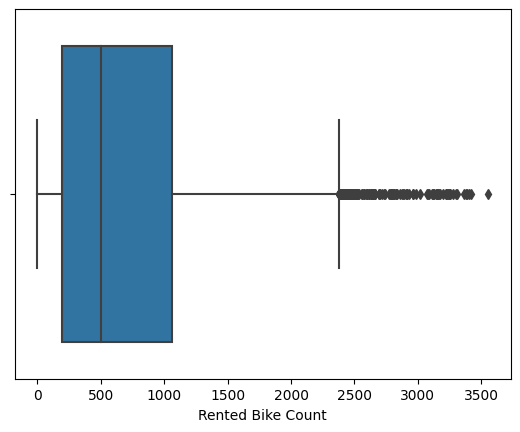

In [17]:
sns.boxplot(x="Rented Bike Count",data=df)

<Axes: xlabel='Hour'>

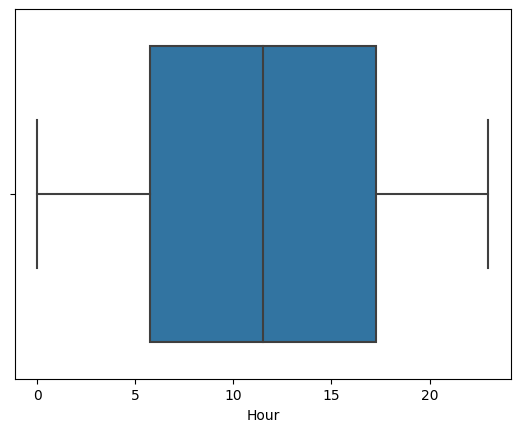

In [18]:
sns.boxplot(x="Hour",data=df)

<Axes: xlabel='Temperature(°C)'>

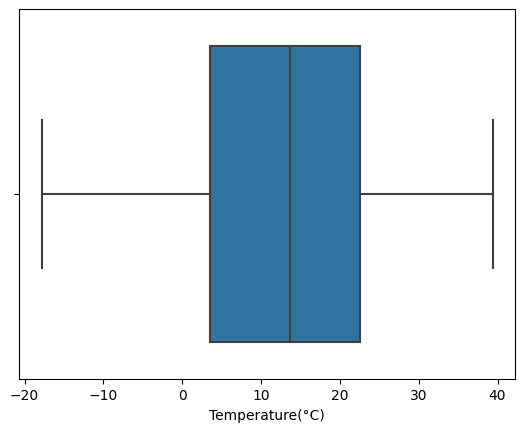

In [19]:
sns.boxplot(x="Temperature(°C)",data=df)

<Axes: xlabel='Humidity(%)'>

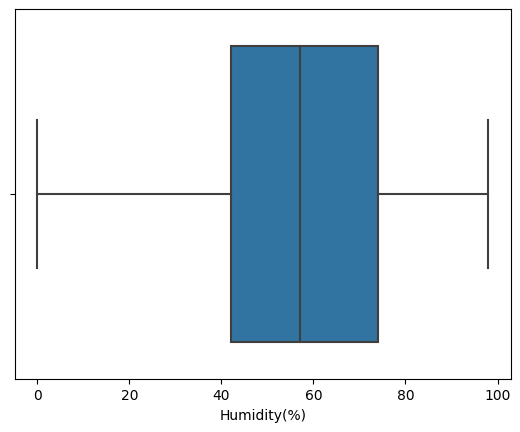

In [20]:
sns.boxplot(x="Humidity(%)",data=df)

<Axes: xlabel='Wind speed (m/s)'>

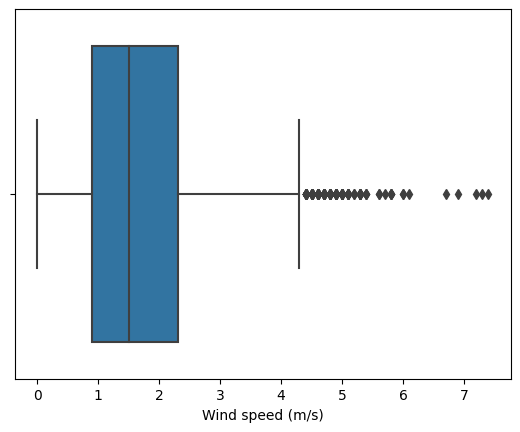

In [21]:
sns.boxplot(x="Wind speed (m/s)",data=df)

<Axes: xlabel='Visibility (10m)'>

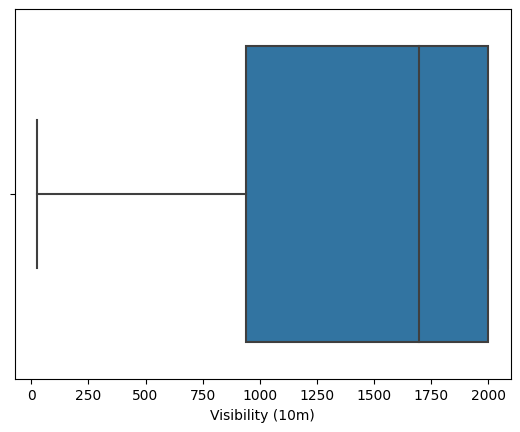

In [22]:
sns.boxplot(x="Visibility (10m)",data=df)

<Axes: xlabel='Dew point temperature(°C)'>

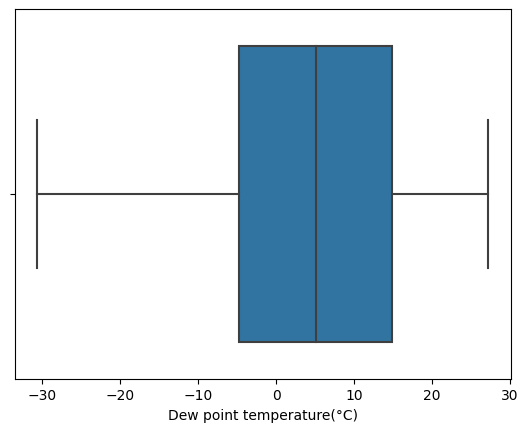

In [23]:
sns.boxplot(x="Dew point temperature(°C)",data=df)

<Axes: xlabel='Solar Radiation (MJ/m2)'>

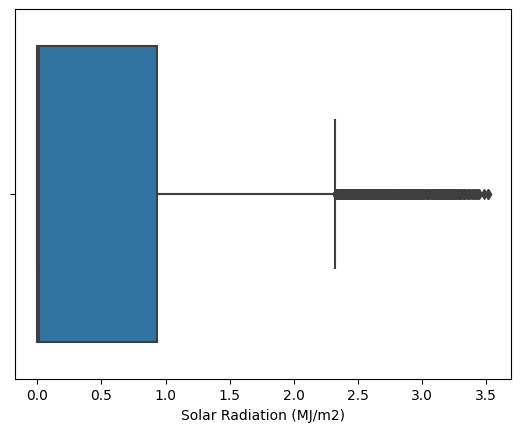

In [24]:
sns.boxplot(x="Solar Radiation (MJ/m2)",data=df)

<Axes: xlabel='Rainfall(mm)'>

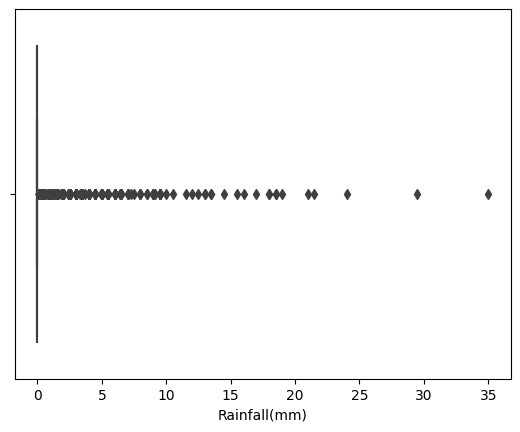

In [25]:
sns.boxplot(x="Rainfall(mm)",data=df)

<Axes: xlabel='Snowfall (cm)'>

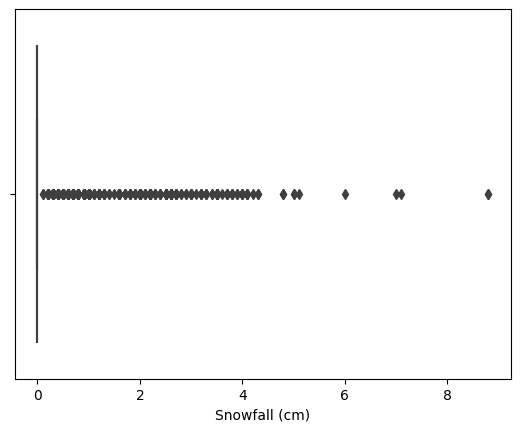

In [26]:
sns.boxplot(x="Snowfall (cm)",data=df)

We can see 'Rented Bike Count','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'this column have outliers.

# Removing outliers

In [27]:
df = df[df['Rented Bike Count'] < df['Rented Bike Count'].quantile(0.99)]
df = df[df['Wind speed (m/s)'] < df['Wind speed (m/s)'].quantile(0.99)]
df = df[df['Solar Radiation (MJ/m2)'] < df['Solar Radiation (MJ/m2)'].quantile(0.99)]
df = df[df['Rainfall(mm)'] < df['Rainfall(mm)'].quantile(0.99)]
df = df[df['Snowfall (cm)'] < df['Snowfall (cm)'].quantile(0.99)]

<Axes: xlabel='Rented Bike Count'>

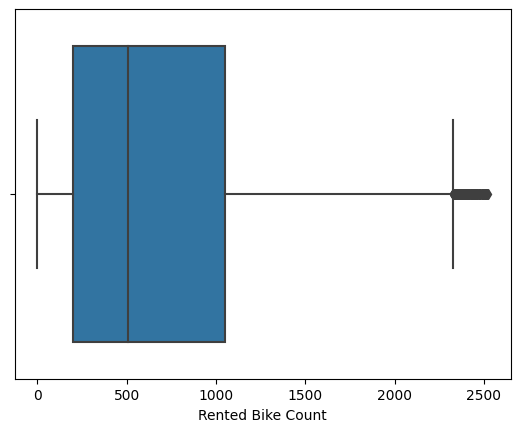

In [28]:
sns.boxplot(x="Rented Bike Count",data=df)

<Axes: xlabel='Wind speed (m/s)'>

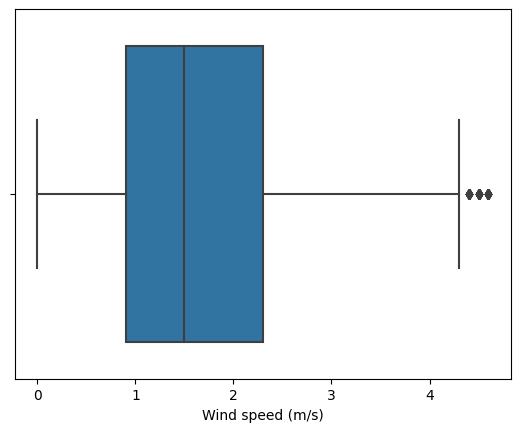

In [29]:
sns.boxplot(x="Wind speed (m/s)",data=df)

<Axes: xlabel='Solar Radiation (MJ/m2)'>

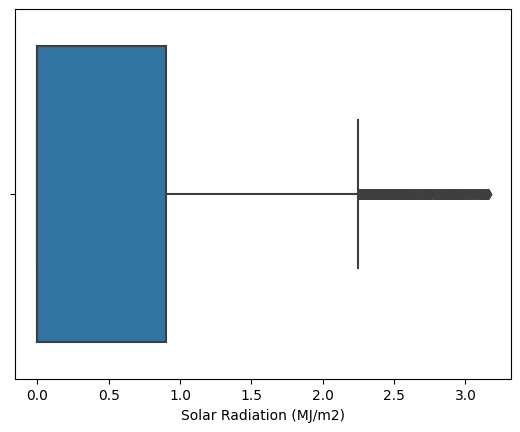

In [30]:
sns.boxplot(x="Solar Radiation (MJ/m2)",data=df)

<Axes: xlabel='Rainfall(mm)'>

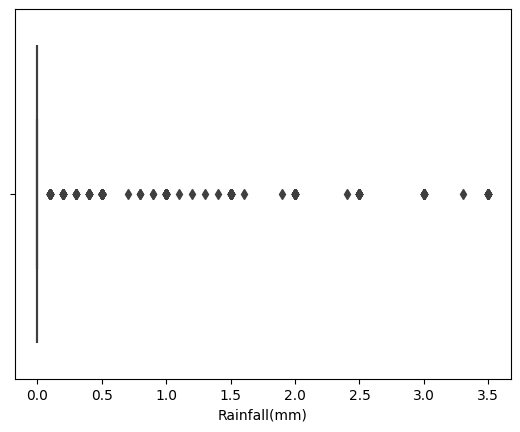

In [31]:
sns.boxplot(x="Rainfall(mm)",data=df)

<Axes: xlabel='Snowfall (cm)'>

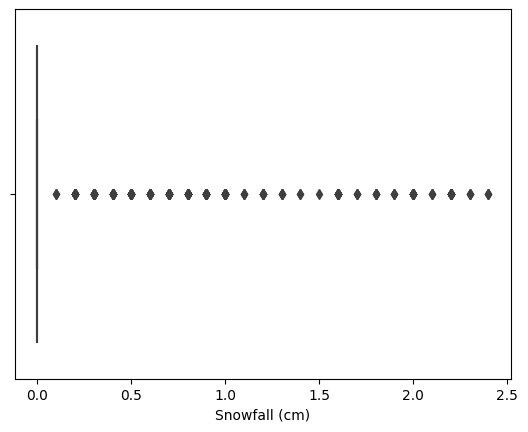

In [32]:
sns.boxplot(x="Snowfall (cm)",data=df)

In [33]:
# We can check before removeing outliers shape of data is 8760 row.
# We can check after removeing outliers shape of data is 8305 row.

df.shape

(8305, 16)

# PERFORMING EXPLORATOTY DATA ANALYSIS (EDA)

# Analyse Age colum

In [34]:
df['Rented Bike Count'].value_counts()

Rented Bike Count
0       286
223      19
189      18
103      18
262      18
       ... 
1352      1
964       1
1923      1
2048      1
595       1
Name: count, Length: 2066, dtype: int64

In [35]:
df['Rented Bike Count'].min(),df['Rented Bike Count'].max()

(0, 2525)

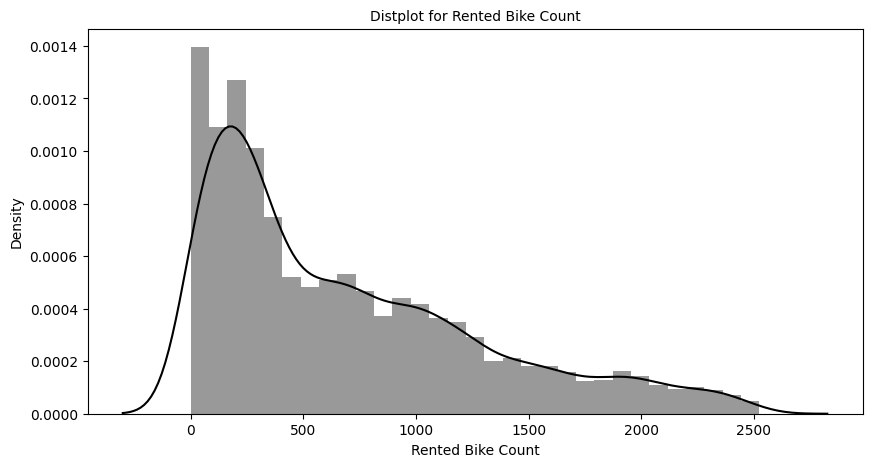

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(df['Rented Bike Count'],color="k")
plt.title('Distplot for Rented Bike Count',fontsize=10)
plt.xlabel('Rented Bike Count',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.show()

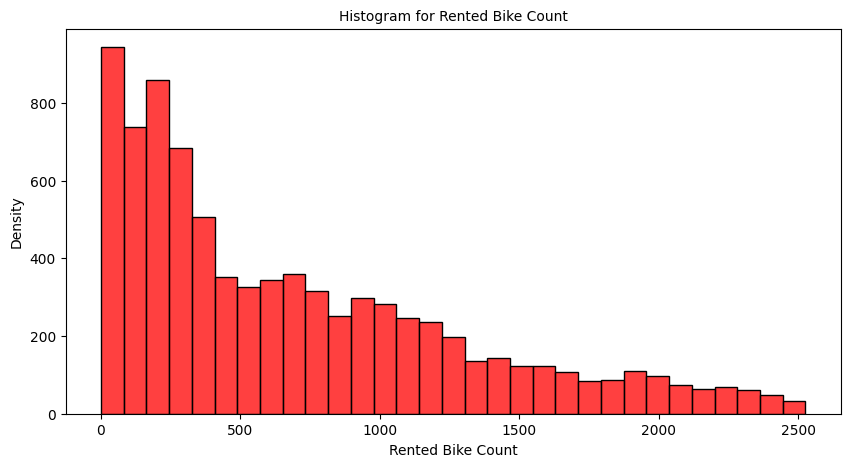

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(x='Rented Bike Count',data=df,color="r")
plt.title('Histogram for Rented Bike Count',fontsize=10)
plt.xlabel('Rented Bike Count',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.show()

Observation:
            
            * From the above graph
            * Here we can clearly see that the distribution of our dependent variable is Right skewed.
            * Most the Bike rente count in between 0 to 1000.

# Compare colum Rented Bike Count and Hour	

In [38]:
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

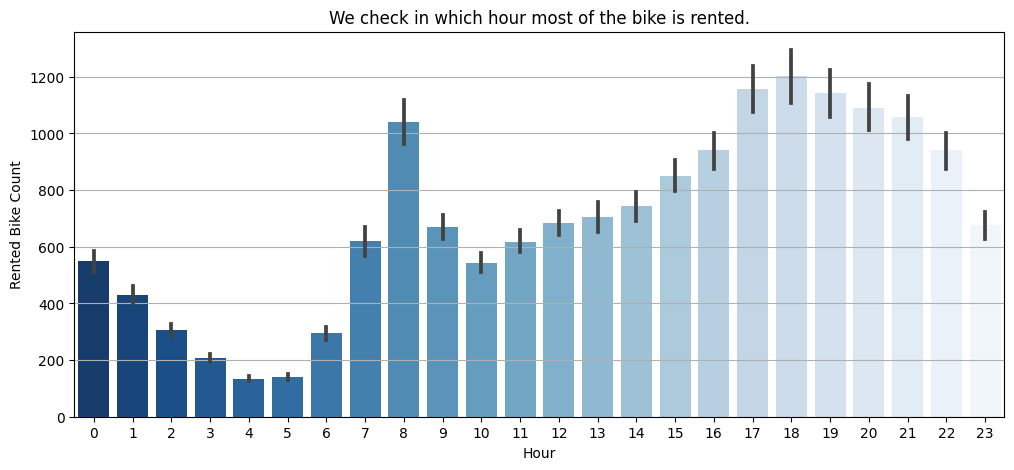

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour',y='Rented Bike Count',data=df,palette='Blues_r')
plt.title('We check in which hour most of the bike is rented.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

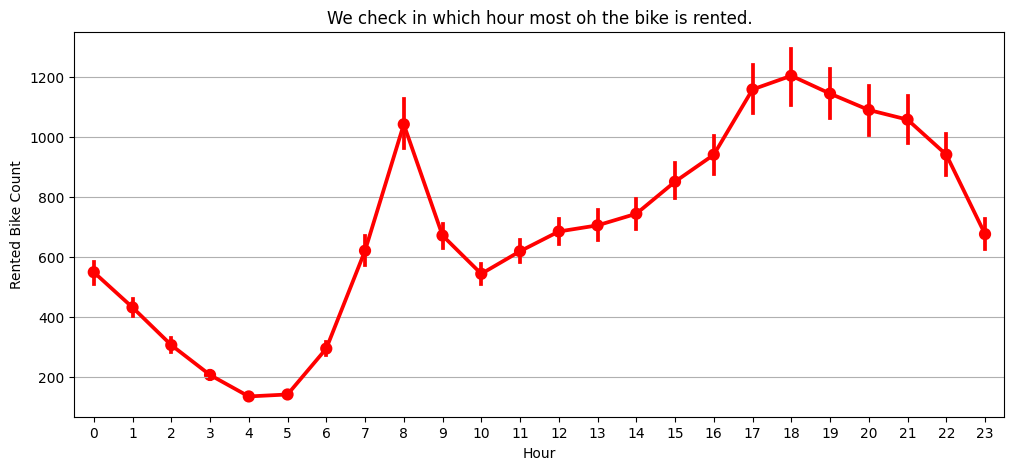

In [40]:
plt.figure(figsize=(12,5))
sns.pointplot(x='Hour',y='Rented Bike Count',data=df,color="r")
plt.title('We check in which hour most oh the bike is rented.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:
            
            * From above two graph we can see
            * Hour number 8,17,18,19,20,21 is the hour where more than 1000 bikes are rented.

# Compare colum Rented Bike Count and Temperature

In [41]:
df['Temperature(°C)'].unique()

array([ -5.2,  -5.5,  -6. ,  -6.2,  -6.4,  -6.6,  -7.4,  -7.6,  -6.5,
        -3.5,  -0.5,   1.7,   2.4,   3. ,   2.1,   1.2,   0.8,   0.6,
         0. ,  -0.3,  -0.8,  -0.9,  -1.3,  -1.8,  -2.2,  -2.9,  -3.8,
        -4. ,  -4.3,  -4.4,  -4.2,  -0.4,   1.9,   4.3,   6. ,   7.3,
         7.6,   6.4,   5.5,   5. ,   4.6,   4.1,   3.5,   4. ,   3.9,
         3.3,   3.4,   3.1,   3.2,   4.4,   5.1,   5.8,   6.8,   8. ,
         6.7,   5.7,   5.2,   4.7,   4.2,   3.6,   2.8,   2. ,   0.2,
        -1.5,  -1.1,   0.1,  -2.1,  -3.6,  -4.6,  -5.3,  -5.8,  -6.1,
        -6.8,  -6.9,  -7.2,  -7.5,  -8.1,  -3.9,  -2.3,  -1.6,  -0.7,
        -2.6,  -3.2,  -3.7,  -2.8,  -2.5,  -3. ,  -3.4,  -3.3,   1.6,
         5.3,   1.1,   1.3,   1.4,   1.5,   1. ,   0.3,  -0.2,   2.3,
         3.7,   0.7,  -1.4,  -2.7,  -4.8,  -7. ,  -6.7,  -2. ,  -1.7,
        -2.4,  -3.1,  -4.1,  -4.7,  -5.1,  -5.4,   2.5,  -0.1,   0.4,
         5.4,  -5.6,  -5.9,  -7.1,  -7.9,  -8.6,  -9.3,  -9.7, -10.2,
       -10.7, -11. ,

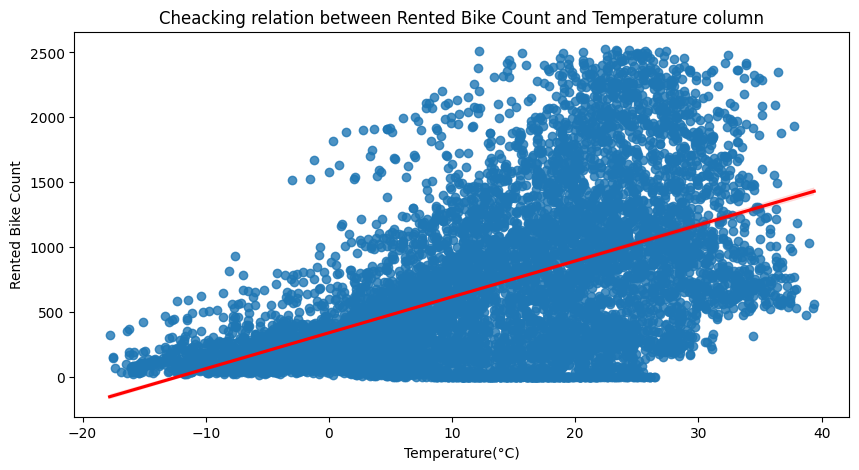

In [42]:
plt.figure(figsize=(10,5))
sns.regplot(x='Temperature(°C)',y='Rented Bike Count',data=df,line_kws={"color": "red"})
plt.title('Cheacking relation between Rented Bike Count and Temperature column')
plt.xlabel('Temperature(°C)',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.show()

Observation:
            
            * From the above regression plot we can see
            * The relation between Rented Bike Count and Temperature column is positive relation
            * Which means when Temperature is increase then Bike rented count also increase.

# Compare colum Rented Bike Count and Humidity(%)

In [43]:
df['Humidity(%)'].unique()

array([37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 26, 54, 58, 66, 77, 79,
       81, 83, 84, 87, 86, 82, 68, 57, 49, 41, 48, 51, 53, 52, 55, 56, 69,
       71, 73, 75, 91, 92, 89, 85, 76, 90, 88, 47, 29, 32, 43, 45, 44, 42,
       34, 33, 31, 28, 30, 46, 59, 78, 70, 64, 60, 94, 93, 96, 65, 50, 74,
       63, 61, 72, 62, 22, 67, 80, 95, 20, 17, 18, 16, 14, 19, 15, 97, 98,
       13, 12, 11,  0], dtype=int64)

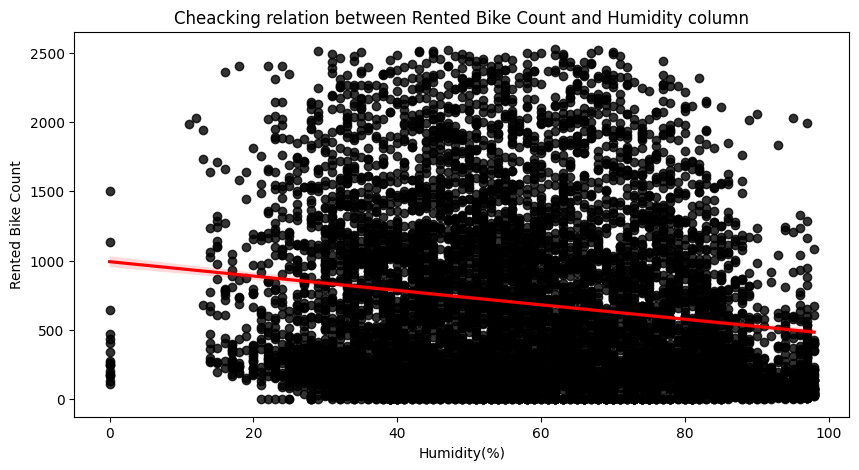

In [44]:
plt.figure(figsize=(10,5))
sns.regplot(x='Humidity(%)',y='Rented Bike Count',data=df,line_kws={"color": "red"},color='k')
plt.title('Cheacking relation between Rented Bike Count and Humidity column')
plt.xlabel('Humidity(%)',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.show()

Observation:

        * From the above regression plot we can see
        * The relation between Rented Bike Count and Humidity  is Negtive relation
        * Which means when Humidity is increase then Bike rented count is decreases.

# Compare colum Rented Bike Count and Wind speed (m/s)

In [45]:
df['Wind speed (m/s)'].unique()

array([2.2, 0.8, 1. , 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, 1.2, 1.4, 1.6, 2. ,
       3.2, 4.2, 1.7, 0.6, 2.1, 2.5, 1.8, 2.6, 1.9, 2.7, 3.7, 3.4, 3.5,
       4.5, 4.1, 3.9, 3. , 2.4, 2.8, 0. , 3.1, 2.9, 0.7, 0.4, 3.3, 4.3,
       4. , 3.8, 3.6, 4.6, 0.1, 0.3, 4.4, 0.2])

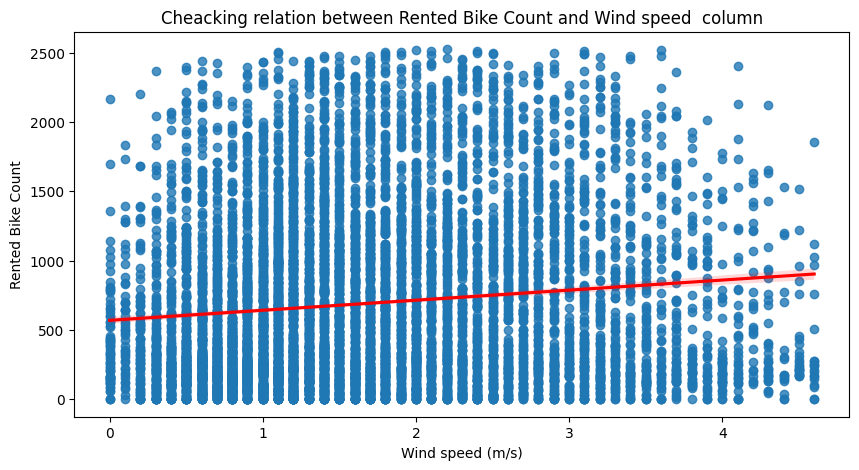

In [46]:
plt.figure(figsize=(10,5))
sns.regplot(x='Wind speed (m/s)',y='Rented Bike Count',data=df,line_kws={"color": "red"})
plt.title('Cheacking relation between Rented Bike Count and Wind speed  column')
plt.xlabel('Wind speed (m/s)',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.show()

Observation:

        * From the above regression plot we can see
        * The relation between Rented Bike Count and Wind speed  is positive relation
        * Which means when Wind speed is increase then Bike rented count also increase.

# Compare colum Rented Bike Count and Visibility (10m)

In [47]:
df['Visibility (10m)'].unique()

array([2000, 1928, 1996, ...,  524,  388, 1688], dtype=int64)

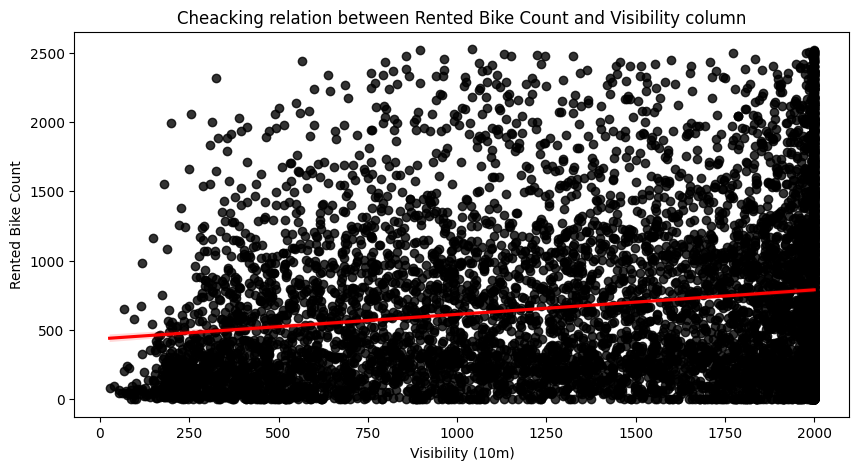

In [48]:
plt.figure(figsize=(10,5))
sns.regplot(x='Visibility (10m)',y='Rented Bike Count',data=df,line_kws={"color": "red"},color='k')
plt.title('Cheacking relation between Rented Bike Count and Visibility column')
plt.xlabel('Visibility (10m)',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.show()

Observation:

    * From the above regression plot we can see
    * The relation between Rented Bike Count and Visibility is positive relation
    * Which means when Visibility is increase then Bike rented count also increase.

# Compare colum Rented Bike Count and Dew point temperature(°C)

In [49]:
df['Dew point temperature(°C)'].unique()

array([-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19.8, -22.4, -21.2,
       -20.2, -17.2, -15.6, -14.6, -11.4,  -7. ,  -6.5,  -5. ,  -3.5,
        -3.6,  -3.4,  -4.2,  -4.9,  -6.2,  -6.9,  -7.1,  -7.3,  -7.9,
        -7.8,  -7.7,  -4.8,  -3.8,  -3.3,  -4. ,  -4.6,  -4.1,  -1.2,
         0. ,  -1.3,  -0.8,  -0.1,   1.2,   1.7,   2. ,   2.1,   2.7,
         3.1,   3.4,   3.7,   3.6,   3.8,   3.3,   3.2,   2.6,   2.4,
         2.3,   1.3,   1.1,  -0.5,  -2.5,  -5.7, -11.3, -13. , -12.1,
       -16.7, -17.3, -15.8, -15.3, -16.1, -16.9, -17.8, -18.5, -20.4,
       -20.9, -20.6, -21. , -20.5, -21.8, -22. , -19.7, -18.2, -16. ,
       -15.1, -14.4, -13.5, -13.4, -13.3, -12. ,  -9.4,  -6.1,  -6.4,
        -7.2,  -7.6,  -7.4,  -6.8,  -6. ,  -9.1, -10.3,  -8.2,  -2.9,
         0.2,   0.3,   0.1,   0.5,   0.4,  -0.7,  -1.1,  -1.4,  -2.8,
        -2.2,  -9.3, -10.1,  -9.7,  -9.6, -11.2, -12.2, -12.6, -12.4,
       -13.1, -13.6, -15.4, -17.9, -19.1, -17.1, -16.6, -14.3, -12.9,
       -13.2, -13.9,

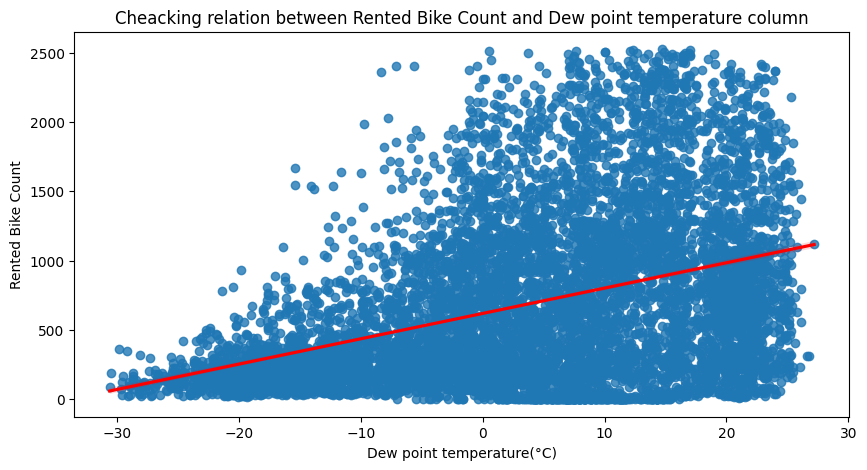

In [50]:
plt.figure(figsize=(10,5))
sns.regplot(x='Dew point temperature(°C)',y='Rented Bike Count',data=df,line_kws={"color": "red"})
plt.title('Cheacking relation between Rented Bike Count and Dew point temperature column')
plt.xlabel('Dew point temperature(°C)',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.show()

Observation:

         * From the above regression plot we can see
         * The relation between Rented Bike Count and Dew point temperature is positive relation
         * Which means when Dew point temperature is increase then Bike rented count also increase.

# Compare colum Rented Bike Count and Solar Radiation (MJ/m2)	 

In [51]:
df['Solar Radiation (MJ/m2)'].unique()

array([0.  , 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01, 0.54, 0.24, 0.08,
       0.3 , 0.8 , 1.  , 1.09, 1.12, 0.99, 0.74, 0.22, 0.06, 0.02, 0.25,
       0.43, 0.6 , 0.69, 0.53, 0.2 , 0.05, 0.64, 0.21, 0.63, 0.93, 1.08,
       1.1 , 0.96, 0.72, 0.36, 0.1 , 0.14, 0.41, 0.98, 1.14, 1.04, 0.84,
       0.51, 0.15, 1.22, 0.87, 0.56, 0.18, 0.61, 0.89, 1.05, 1.13, 1.06,
       0.4 , 0.35, 0.03, 0.62, 1.26, 0.92, 0.55, 0.58, 0.19, 1.17, 1.23,
       0.13, 0.52, 0.48, 0.09, 0.34, 0.42, 0.32, 0.86, 1.07, 0.17, 0.88,
       0.85, 0.91, 0.28, 0.71, 0.12, 0.67, 0.77, 0.78, 0.16, 0.66, 0.38,
       0.57, 0.11, 0.04, 0.07, 1.18, 0.9 , 0.33, 0.75, 0.59, 0.29, 0.81,
       0.83, 0.39, 0.47, 1.15, 1.03, 0.95, 0.76, 1.02, 0.26, 0.5 , 0.27,
       0.73, 0.46, 0.31, 1.2 , 1.19, 0.45, 0.49, 0.79, 0.44, 0.68, 1.25,
       1.21, 1.24, 0.7 , 1.28, 1.3 , 1.29, 0.82, 1.65, 2.04, 2.25, 2.18,
       1.91, 1.42, 1.57, 1.99, 2.22, 2.17, 1.4 , 2.12, 2.29, 2.23, 1.94,
       1.44, 1.72, 2.09, 2.3 , 2.24, 1.93, 1.56, 1.

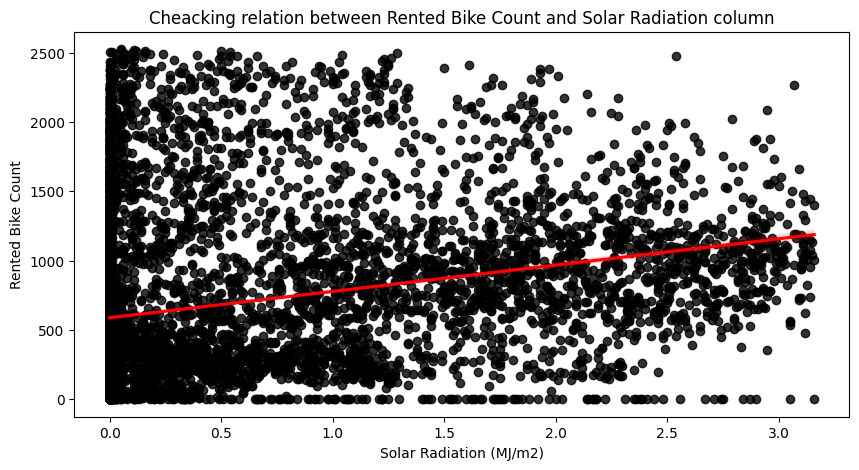

In [52]:
plt.figure(figsize=(10,5))
sns.regplot(x='Solar Radiation (MJ/m2)',y='Rented Bike Count',data=df,line_kws={"color": "red"},color='k')
plt.title('Cheacking relation between Rented Bike Count and Solar Radiation column')
plt.xlabel('Solar Radiation (MJ/m2)',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.show()

Observation:

     * From the above regression plot we can see
     * The relation between Rented Bike Count and Solar Radiation is positive relation
     * Which means when Solar Radiation is increase then Bike rented count also increase.

# Compare colum Rented Bike Count and Rainfall(mm) 

In [53]:
df['Rainfall(mm)'].unique()

array([0. , 0.5, 1. , 2.5, 0.1, 0.2, 0.3, 0.7, 0.4, 3.5, 3.3, 1.4, 2. ,
       1.5, 3. , 1.9, 0.8, 0.9, 2.4, 1.6, 1.1, 1.3, 1.2])

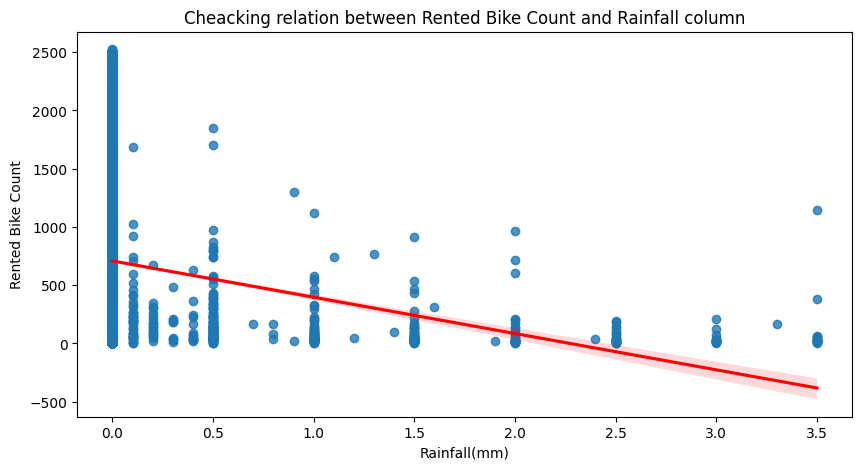

In [54]:
plt.figure(figsize=(10,5))
sns.regplot(x='Rainfall(mm)',y='Rented Bike Count',data=df,line_kws={"color": "red"})
plt.title('Cheacking relation between Rented Bike Count and Rainfall column')
plt.xlabel('Rainfall(mm)',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.show()

Observation:

    * From the above regression plot we can see
    * The relation between Rented Bike Count and Rainfall  is Negtive relation
    * Which means when Rainfall is increase then Bike rented count is decreases.

# Compare colum Rented Bike Count and Snowfall (cm)	

In [55]:
df['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.1, 1.4, 0.5,
       1.3, 1.8, 2. , 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 1.5])

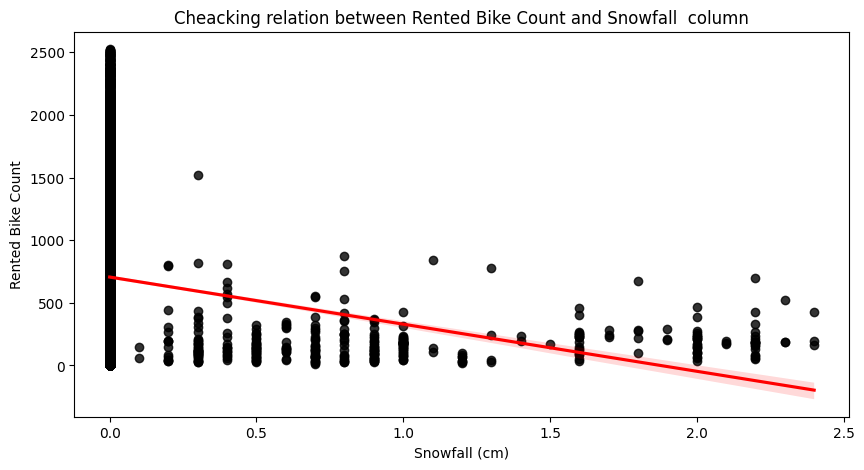

In [56]:
plt.figure(figsize=(10,5))
sns.regplot(x='Snowfall (cm)',y='Rented Bike Count',data=df,line_kws={"color": "red"},color='k')
plt.title('Cheacking relation between Rented Bike Count and Snowfall  column')
plt.xlabel('Snowfall (cm)',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.show()

Observation:

        * From the above regression plot we can see
        * The relation between Rented Bike Count and Snowfall  is Negtive relation
        * Which means when Snowfall is increase then Bike rented count is decreases.

# Compare colum Rented Bike Count and Seasons

In [57]:
no_of_bikerent_in_season=df.groupby(['Seasons'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
no_of_bikerent_in_season


,Seasons,Rented Bike Count
0,Summer,2078276
1,Autumn,1711106
2,Spring,1477262
3,Winter,471665


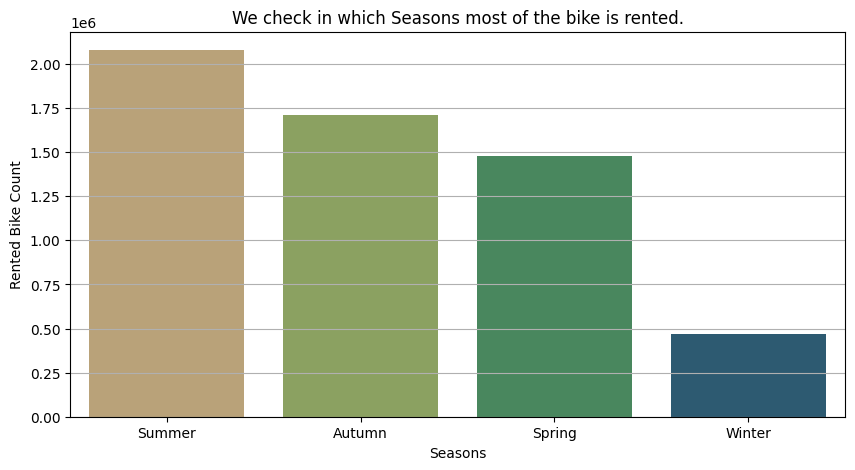

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x='Seasons',y='Rented Bike Count',data=no_of_bikerent_in_season,palette='gist_earth_r')
plt.title('We check in which Seasons most of the bike is rented.')
plt.xlabel('Seasons',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:

    * From the Barplot we can see
    * In Summer season most people take bike on rent.
    * In winter season less number of people take bike on rent because of snowfall or any other reasion.

# Compare colum Rented Bike Count and Holiday

In [59]:
No_of_bikerent_in_Holiday = df.groupby(['Holiday'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
No_of_bikerent_in_Holiday

,Holiday,Rented Bike Count
0,No Holiday,5526102
1,Holiday,212207


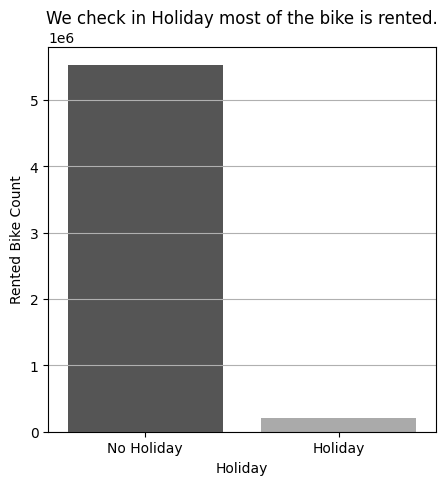

In [60]:
plt.figure(figsize=(5,5))
sns.barplot(x='Holiday',y='Rented Bike Count',data=No_of_bikerent_in_Holiday,palette='gist_yarg_r')
plt.title('We check in Holiday most of the bike is rented.')
plt.xlabel('Holiday',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:
           
           * People take bike on rent in weekdays
           * In Weekend or any Holiday they do not take bike on rent

# Compare colum Rented Bike Count and Functioning Day

In [61]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [62]:
No_of_bikeshare_in_Functioning_Day = df.groupby(['Functioning Day'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
No_of_bikeshare_in_Functioning_Day

,Functioning Day,Rented Bike Count
0,Yes,5738309
1,No,0


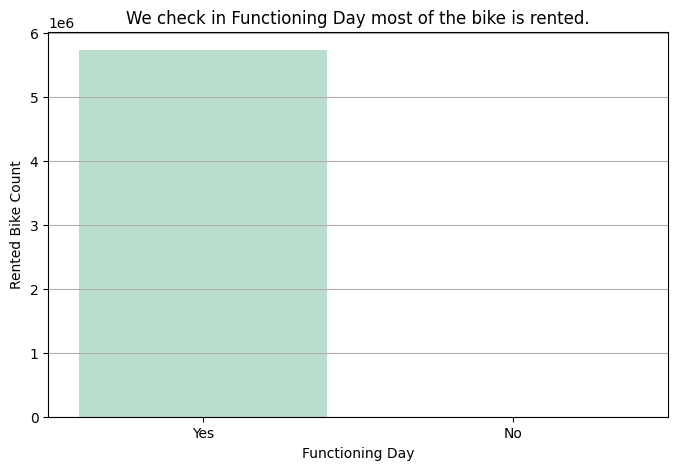

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=No_of_bikeshare_in_Functioning_Day,palette='Pastel2')
plt.title('We check in Functioning Day most of the bike is rented.')
plt.xlabel('Functioning Day',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

 Observation:
    
              * In above bar plot we can say that people rented bike in function day

# Compare colum Rented Bike Count and Month

In [64]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [65]:
No_of_bikerent_in_month = df.groupby(['Month'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
No_of_bikerent_in_month

,Month,Rented Bike Count
0,July,650331
1,June,622298
2,October,590859
3,May,582397
4,August,580985
5,April,499908
6,September,480991
7,November,474007
8,March,443061
9,December,284673


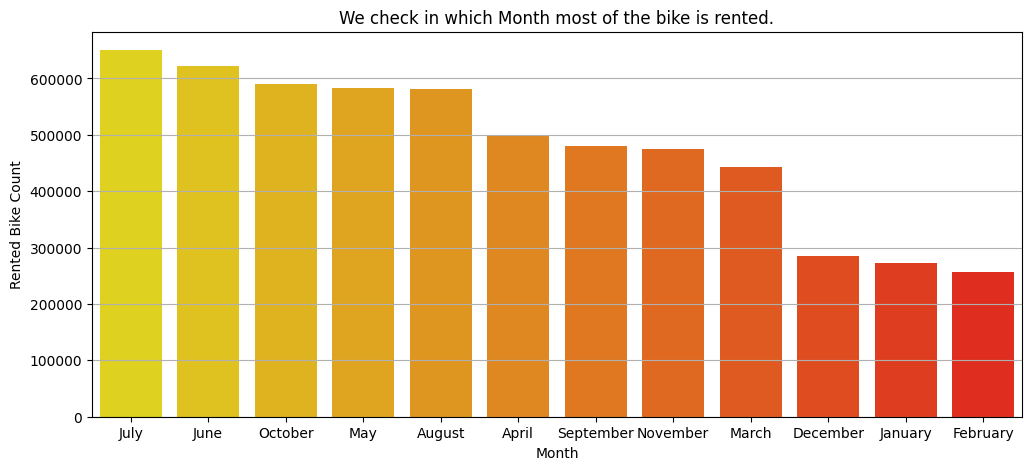

In [66]:
plt.figure(figsize=(12,5))
sns.barplot(x='Month',y='Rented Bike Count',data=No_of_bikerent_in_month,palette='autumn_r')
plt.title('We check in which Month most of the bike is rented.')
plt.xlabel('Month',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:
           
           * May,June,July are the 3 months where most bikes go on rent.
           * December,January,February are the 3 months ewhere less bikes go on rent because of snowfall less Visibility  or
             any other reasion.

# Compare colum Rented Bike Count and Day

In [67]:
df['Day'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [68]:
No_of_bikeshare_in_day = df.groupby(['Day'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
No_of_bikeshare_in_day

,Day,Rented Bike Count
0,Saturday,854586
1,Thursday,846674
2,Wednesday,822996
3,Friday,822793
4,Tuesday,822452
5,Monday,788702
6,Sunday,780106


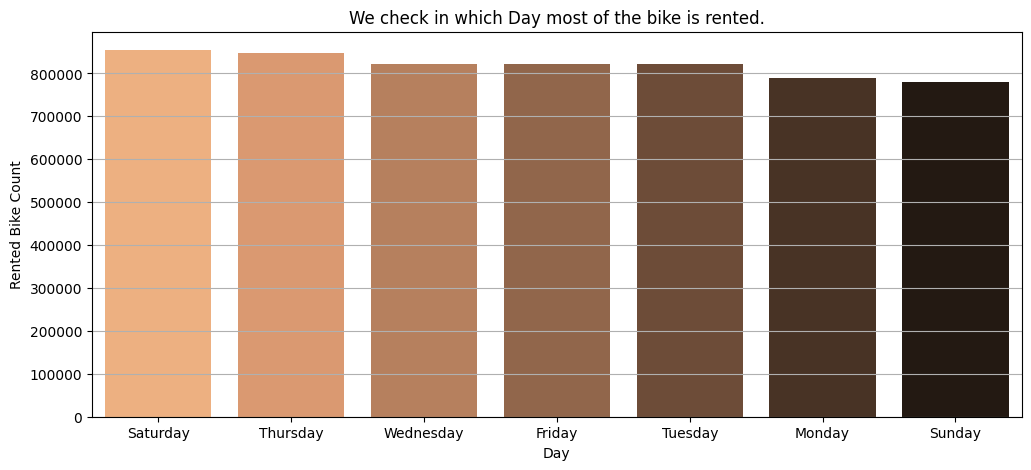

In [69]:
plt.figure(figsize=(12,5))
sns.barplot(x='Day',y='Rented Bike Count',data=No_of_bikeshare_in_day,palette='copper_r')
plt.title('We check in which Day most of the bike is rented.')
plt.xlabel('Day',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:

           * More than 8lakh bike go on rent everyday. BUT
           * We know that sunday is off day so people don't go to office that's why rented bike count is low in sunday

# Compare colum Rented Bike Count , Hour and Day

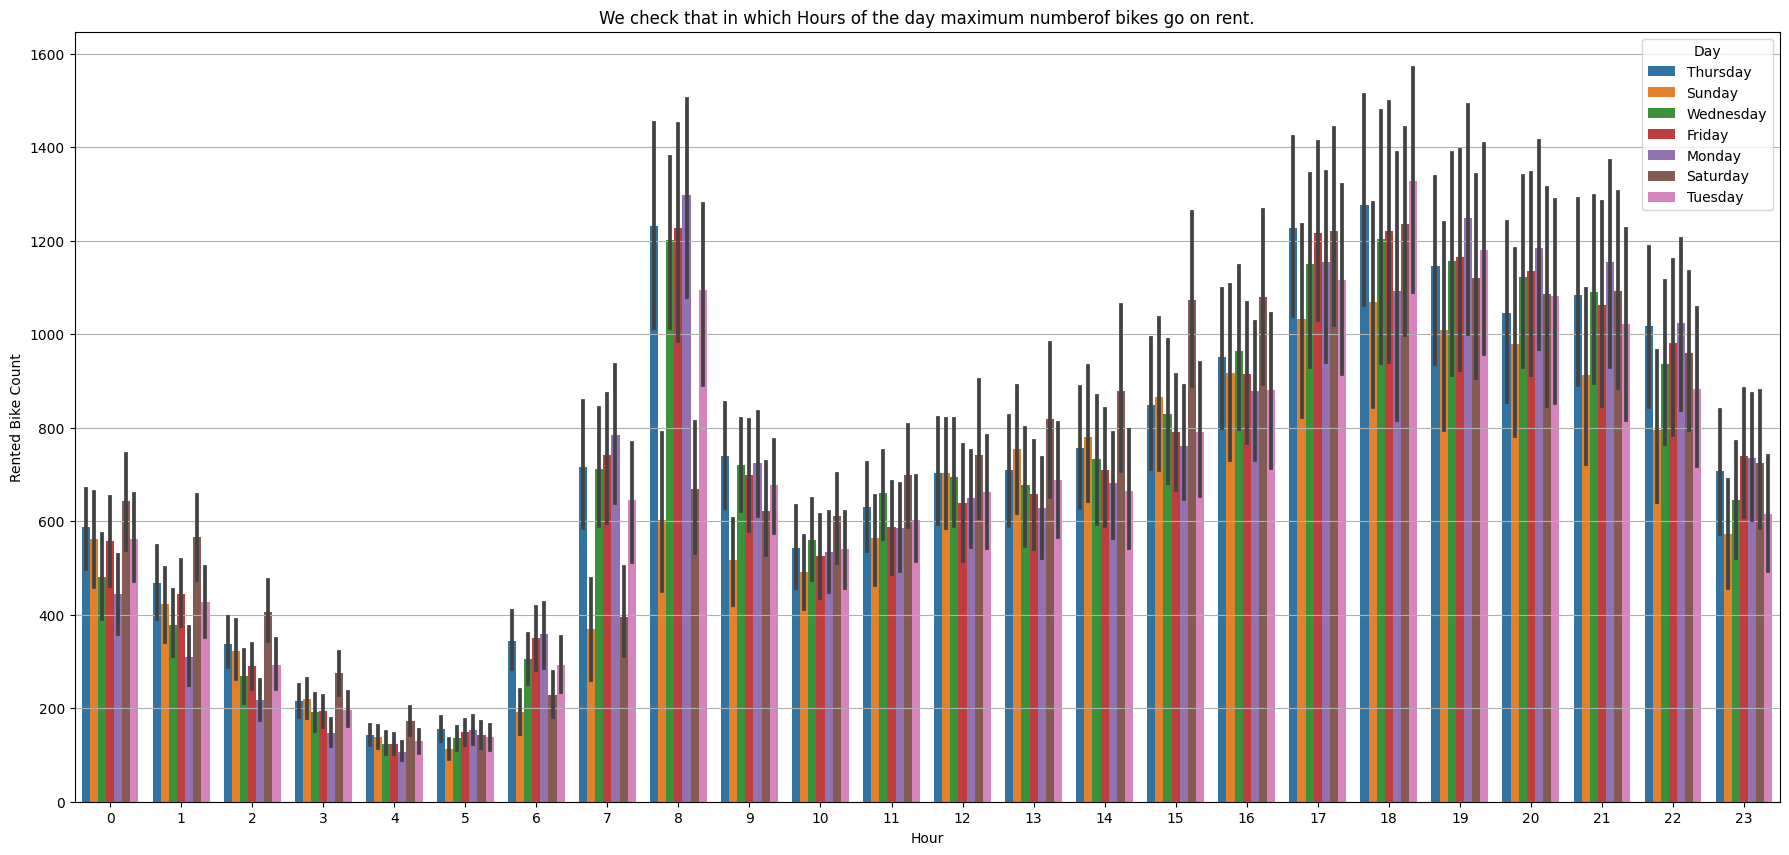

In [70]:
plt.figure(figsize=(22,10))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Day',data=df)
plt.title('We check that in which Hours of the day maximum numberof bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

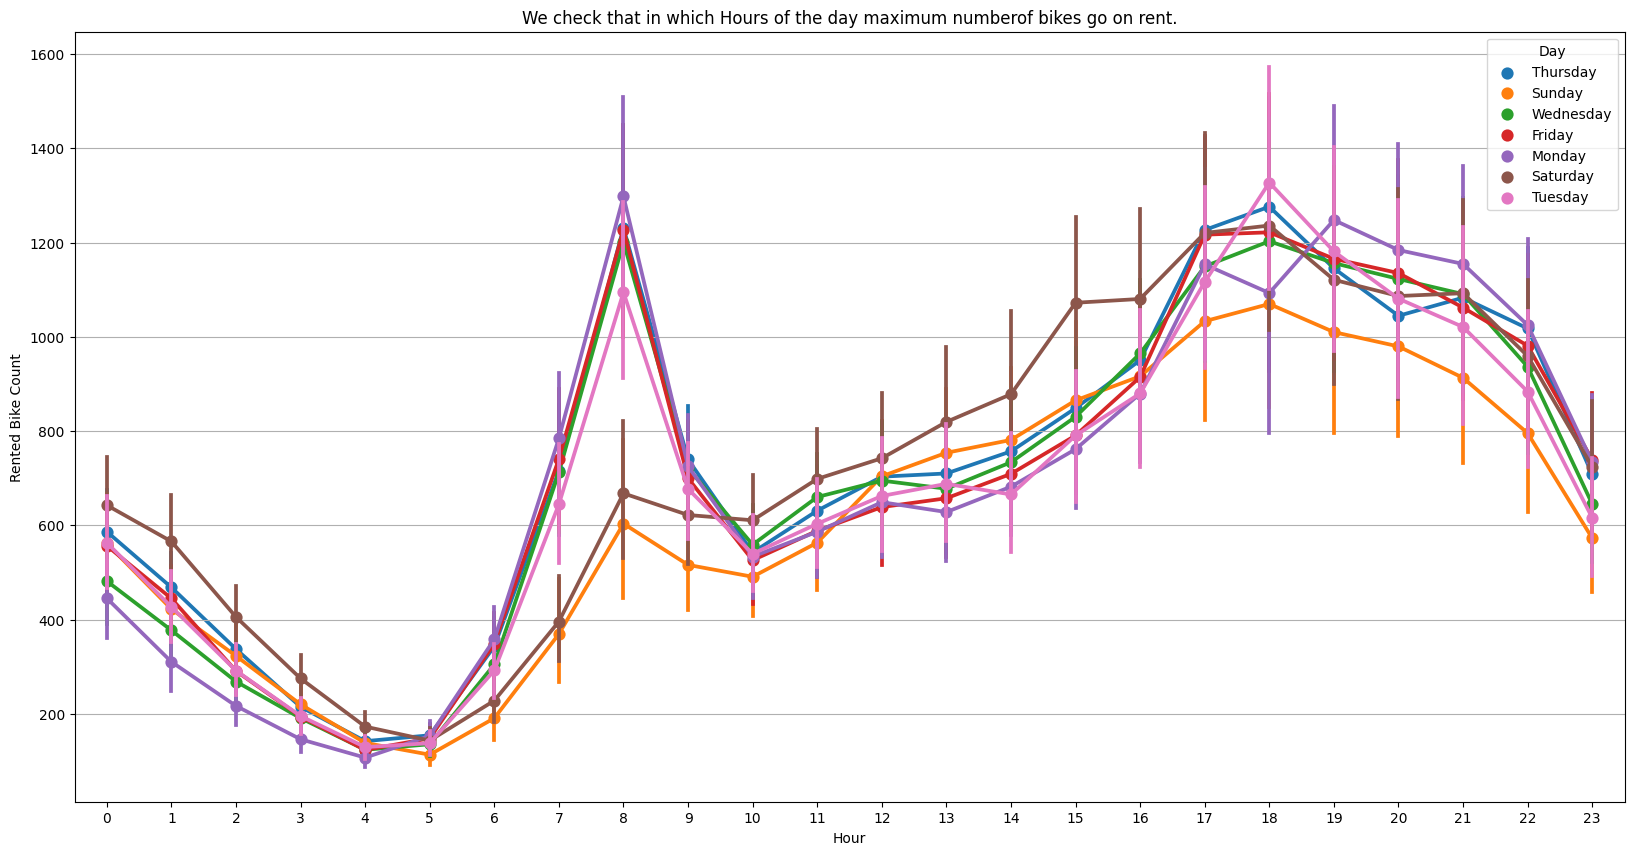

In [71]:
plt.figure(figsize=(20,10))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Day',data=df)
plt.title('We check that in which Hours of the day maximum numberof bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:  
    
            * From the above two plot we can see
            * Bike rental  on highest demanad in all days of week in between 8hr to 20hr

# Compare colum Rented Bike Count , Hour and Seasons

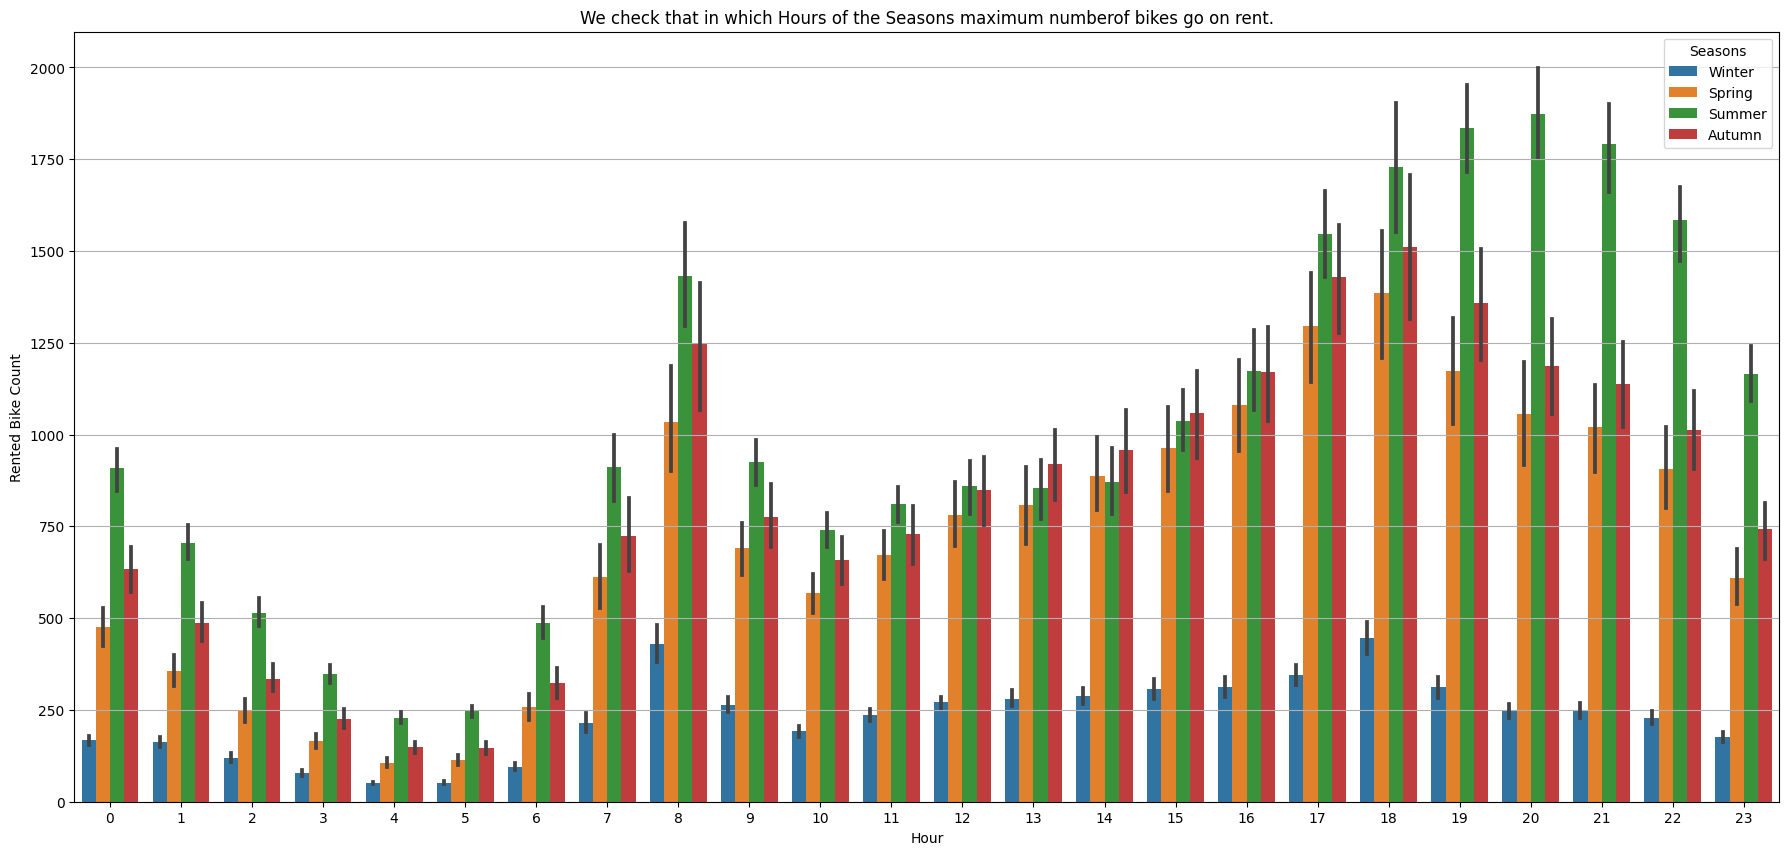

In [72]:
plt.figure(figsize=(22,10))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Seasons',data=df)
plt.title('We check that in which Hours of the Seasons maximum numberof bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

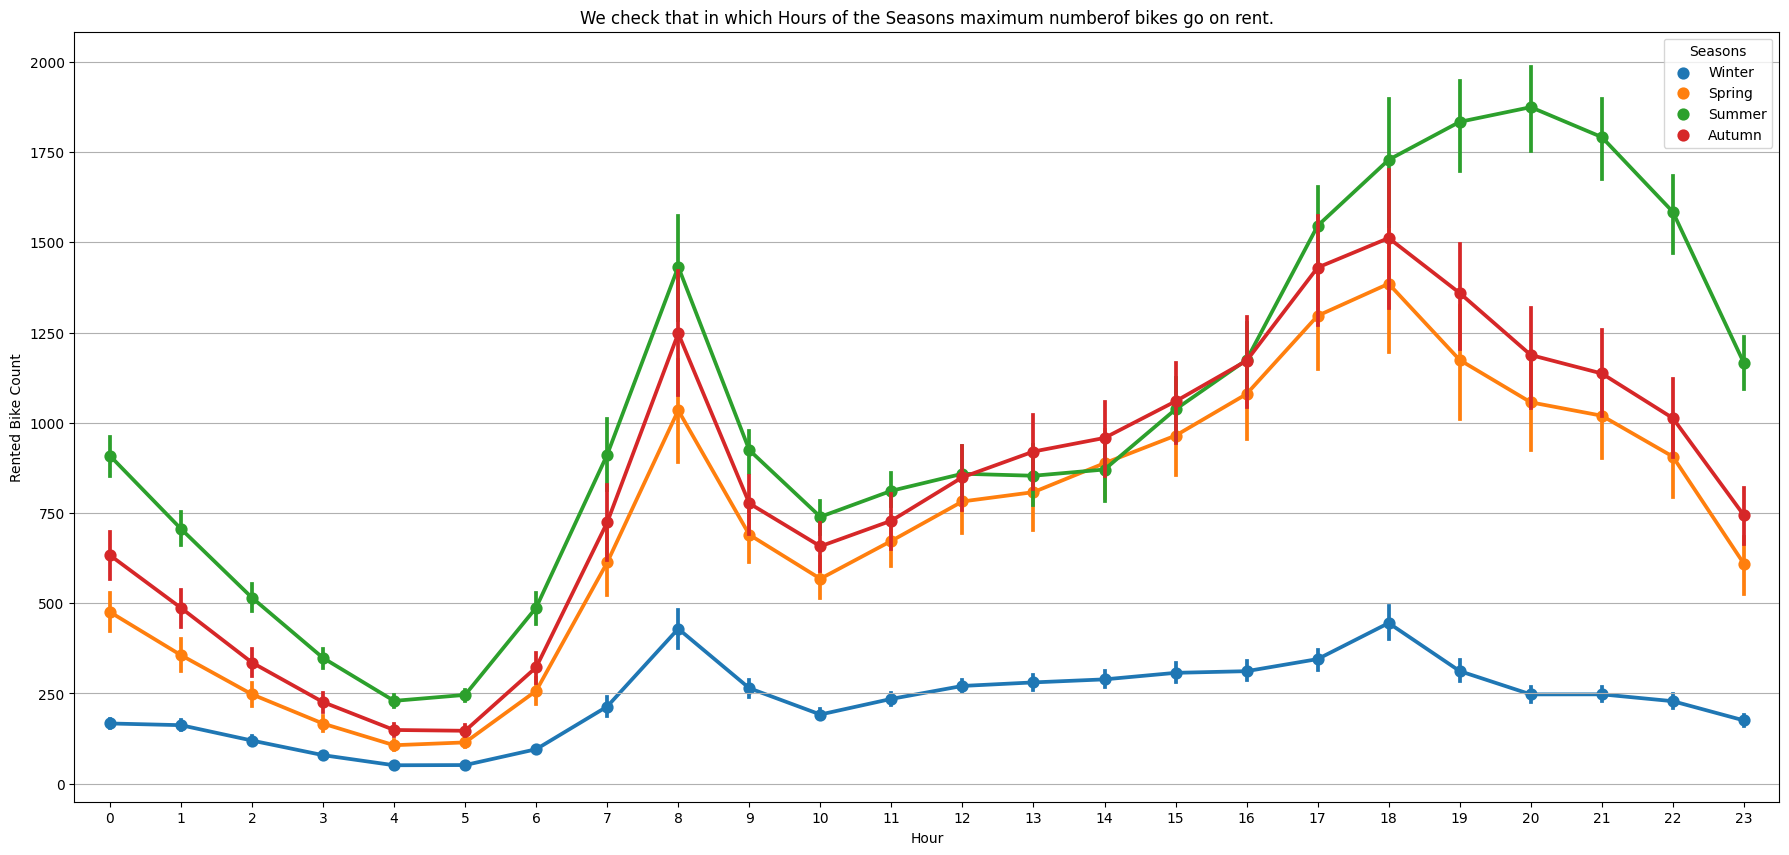

In [73]:
plt.figure(figsize=(22,10))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Seasons',data=df)
plt.title('We check that in which Hours of the Seasons maximum numberof bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation: 
    
           * Spring,Summer and Autumn in these three seasons there is the highest demand for rental bikes between 8hr to 
           20hr.
           * As compare to other seasons Winter has a less demand of rental bike.

# Compare colum Rented Bike Count , Hour and Holiday

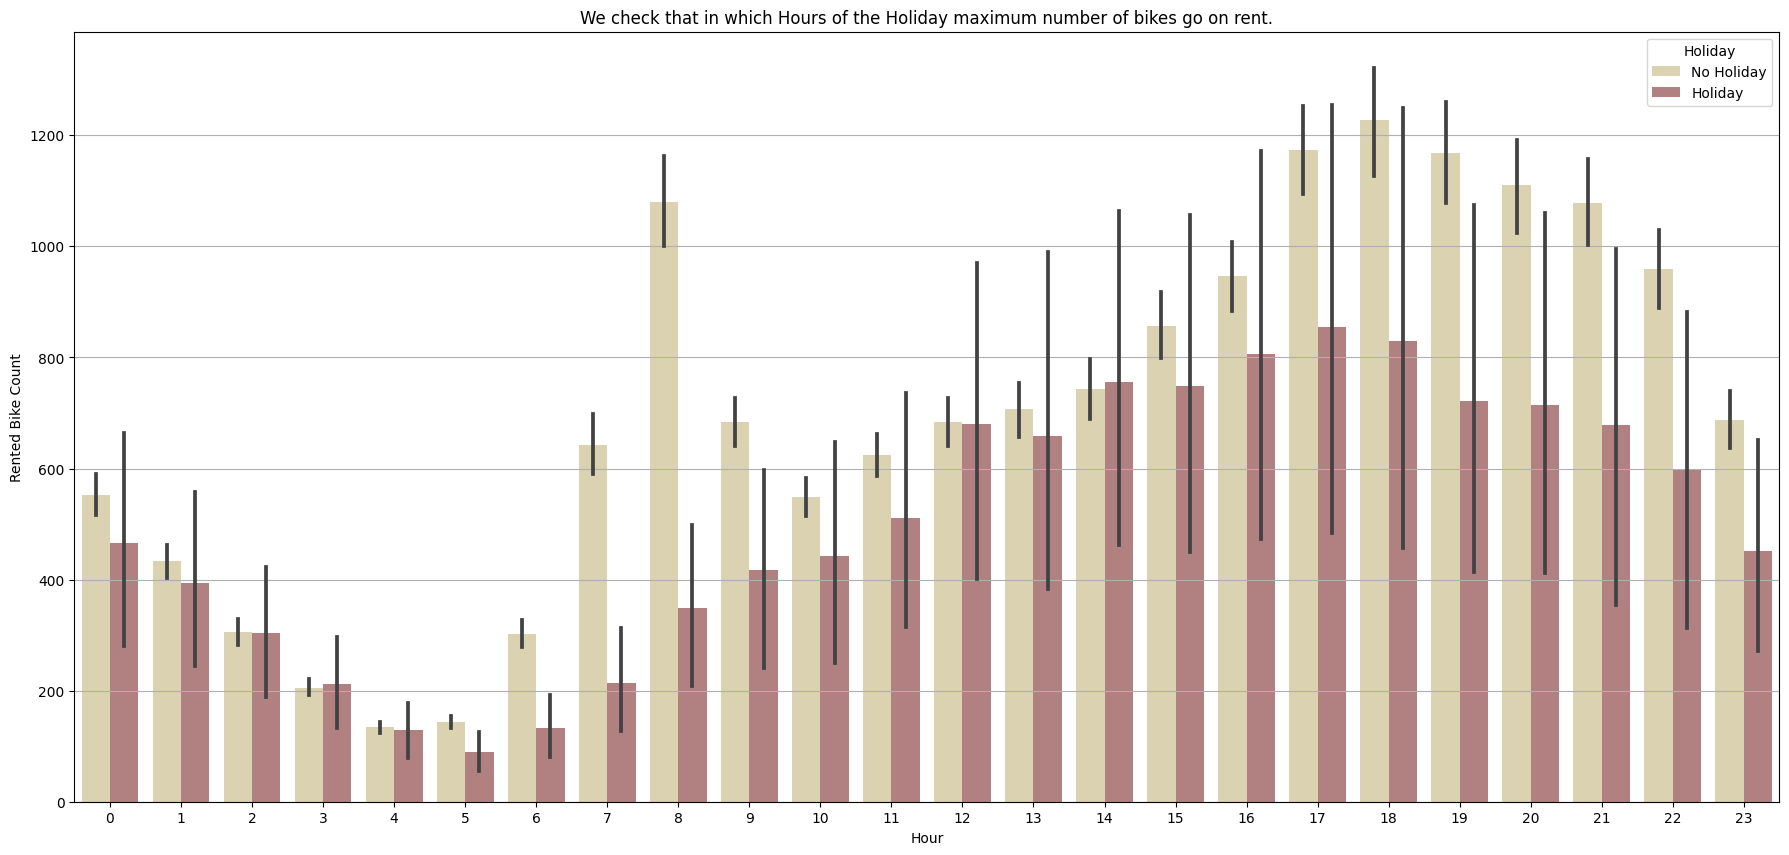

In [74]:
plt.figure(figsize=(22,10))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Holiday',data=df,palette='pink_r')
plt.title('We check that in which Hours of the Holiday maximum number of bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

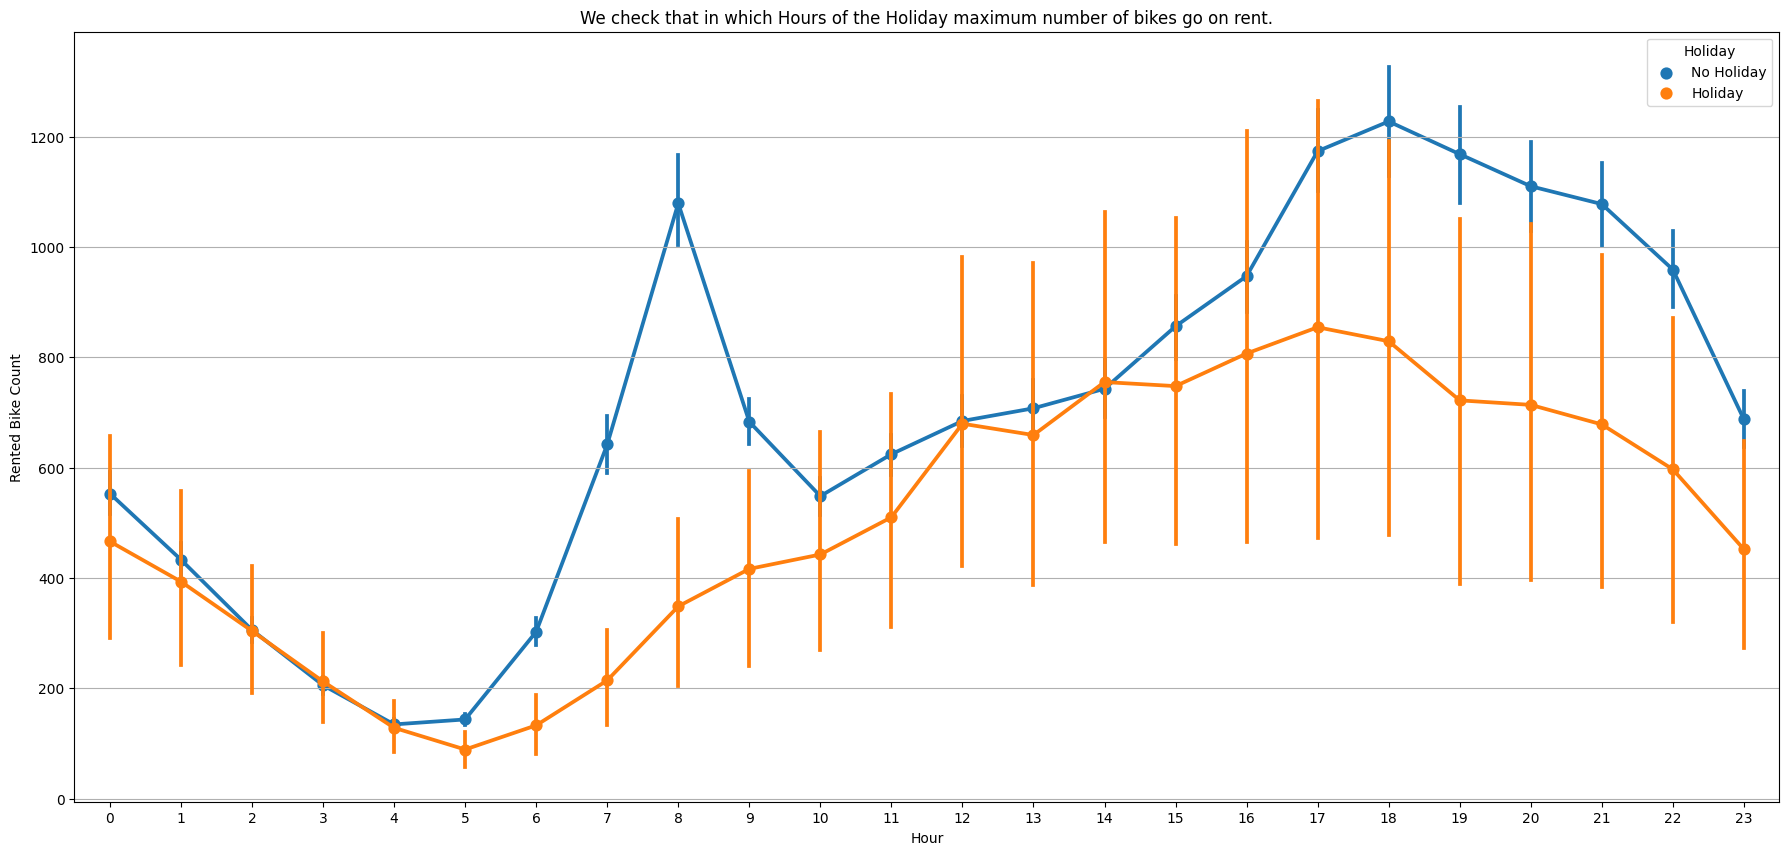

In [75]:
plt.figure(figsize=(22,10))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Holiday',data=df)
plt.title('We check that in which Hours of the Holiday maximum number of bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:
            
        * Rental bike demand is highest on non holidays between 8hr to 20 hr.

# Compare colum Rented Bike Count , Hour and Functioning Day

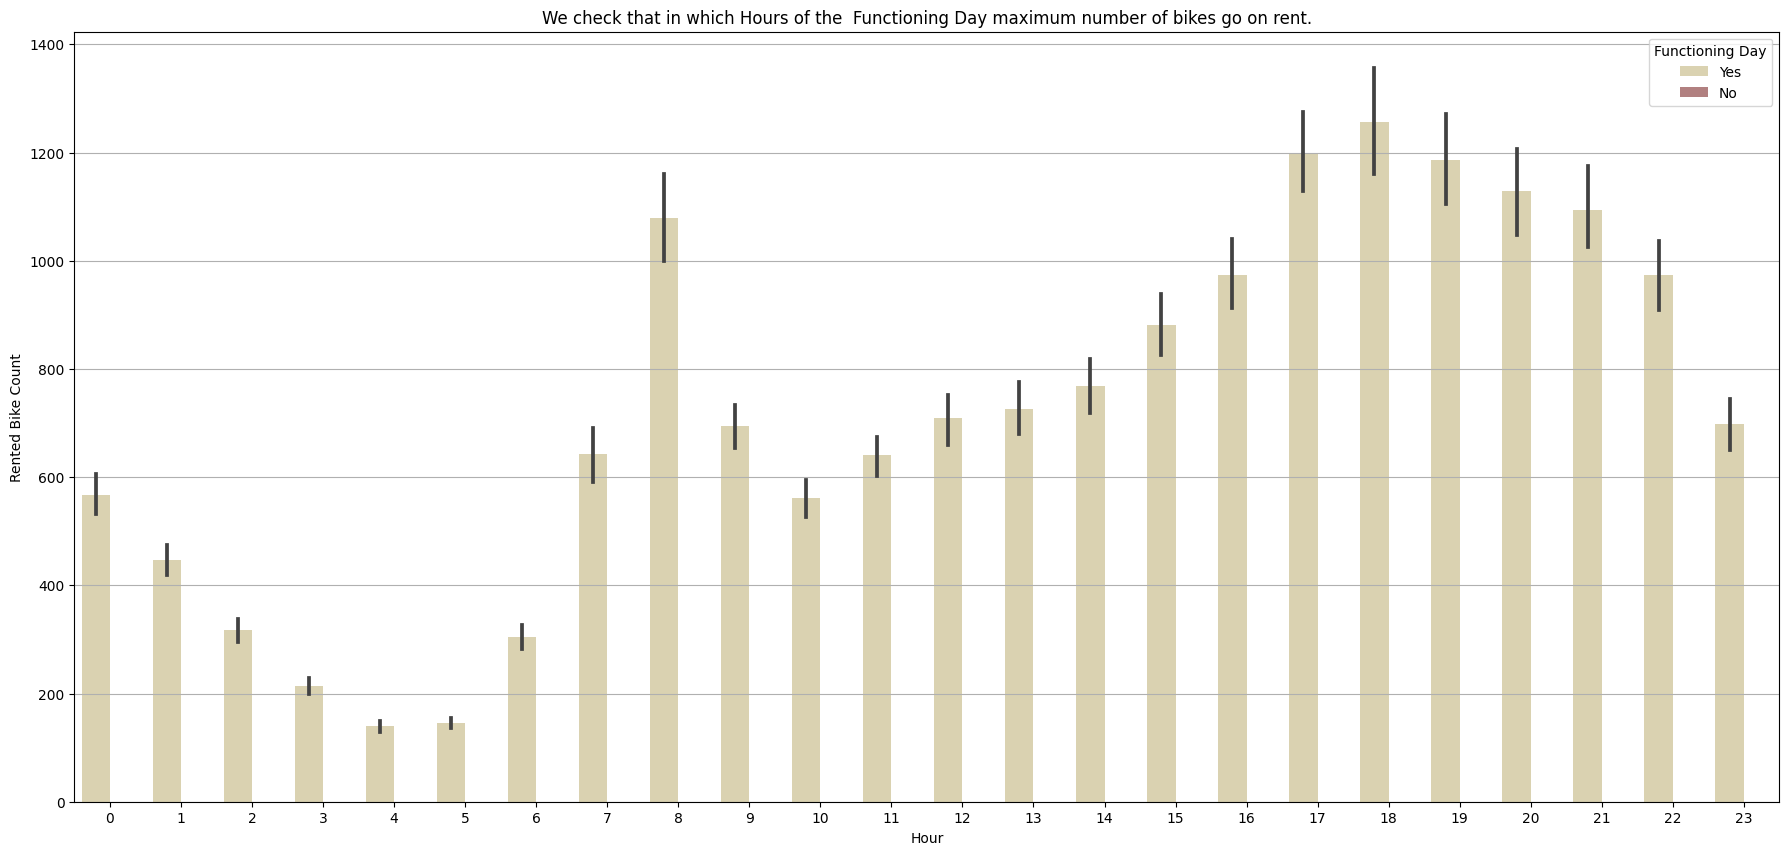

In [76]:
plt.figure(figsize=(22,10))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Functioning Day',data=df,palette='pink_r')
plt.title('We check that in which Hours of the  Functioning Day maximum number of bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

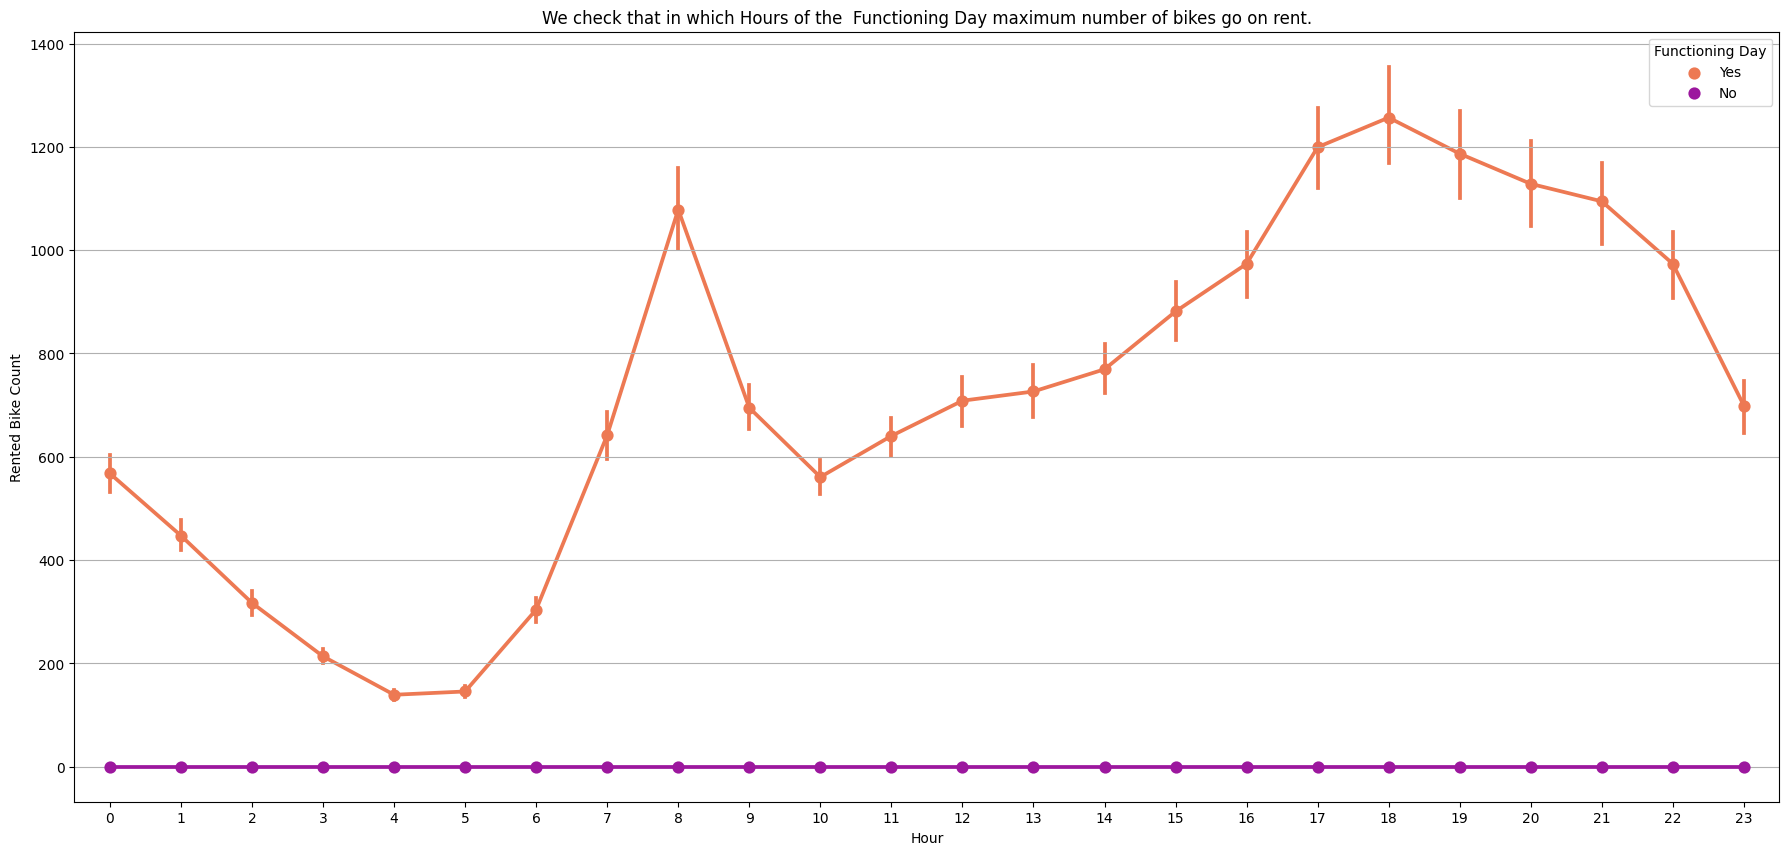

In [77]:
plt.figure(figsize=(22,10))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Functioning Day',data=df,palette='plasma_r')
plt.title('We check that in which Hours of the  Functioning Day maximum number of bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:

           * Rental bike demand is high on function day between 8hr to 20 hr.

# Compare colum Rented Bike Count , Hour and Month

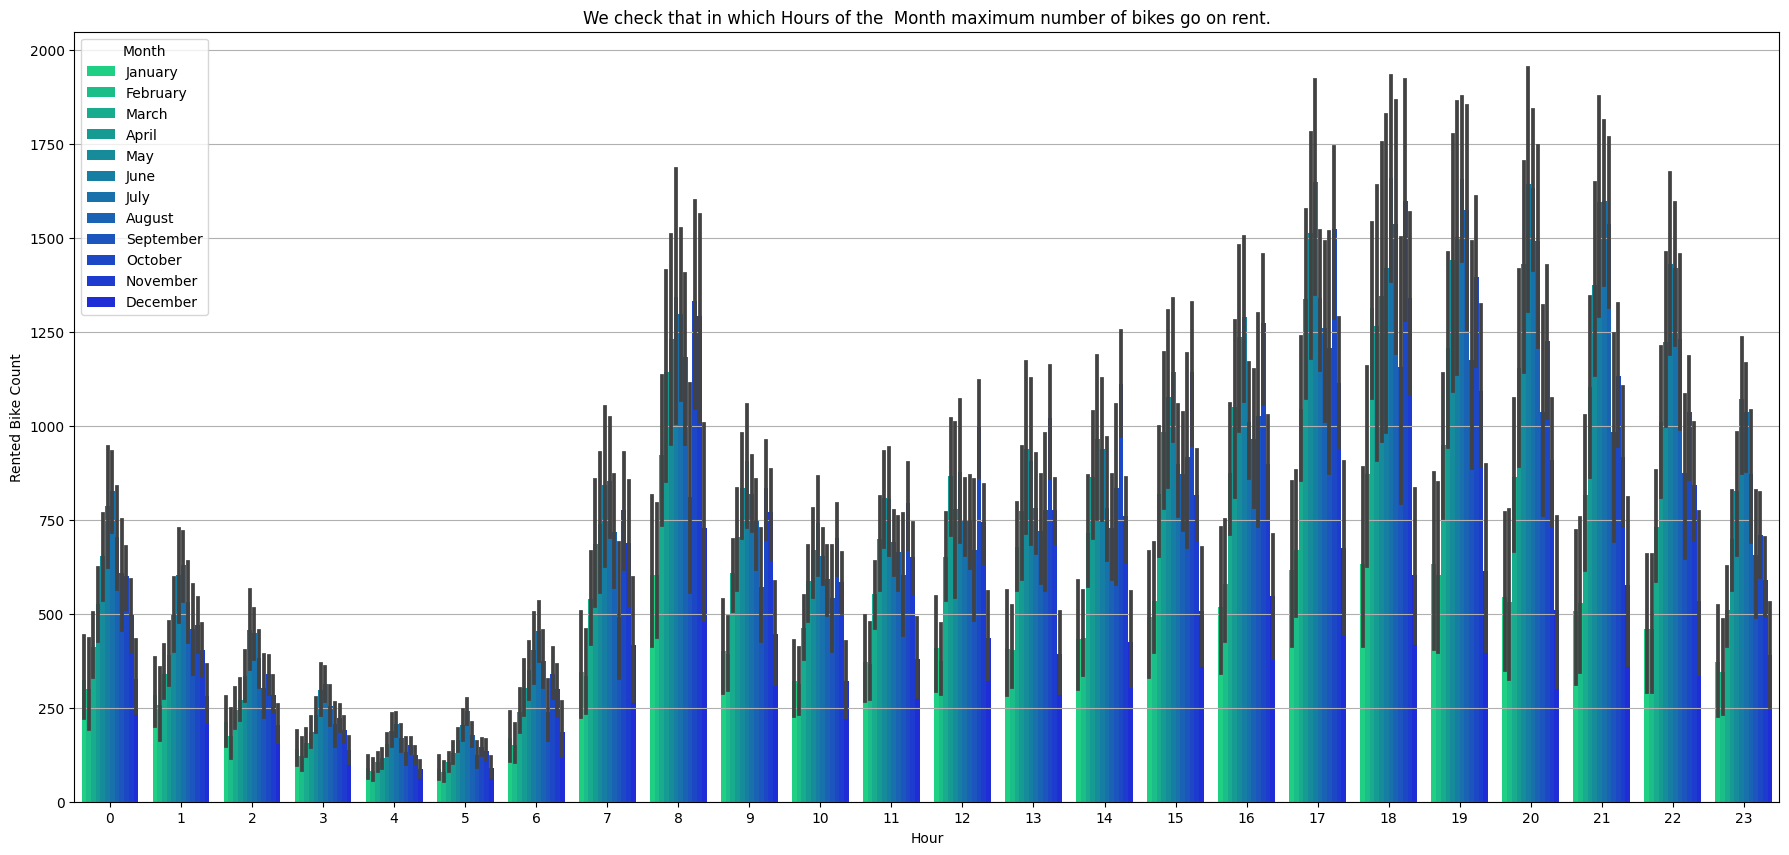

In [78]:
plt.figure(figsize=(22,10))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Month',data=df,palette='winter_r')
plt.title('We check that in which Hours of the  Month maximum number of bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

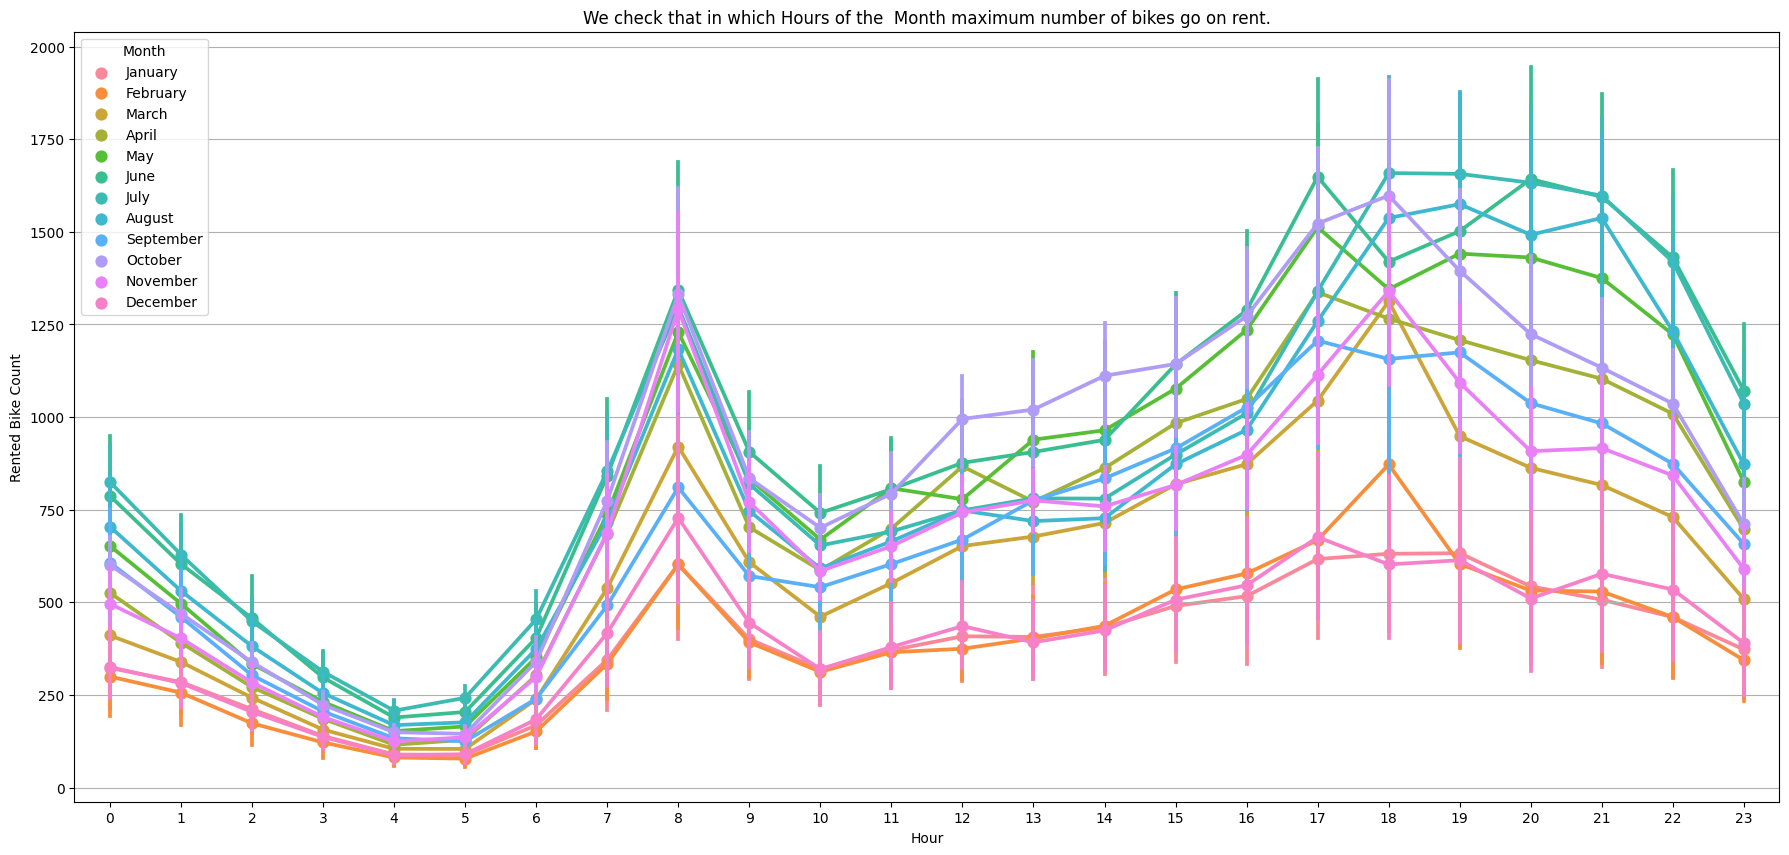

In [79]:
plt.figure(figsize=(22,10))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Month',data=df)
plt.title('We check that in which Hours of the  Month maximum number of bikes go on rent.')
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Rented Bike Count',fontsize=10)
plt.grid(axis='y')

Observation:

       * Rental bike demand is high in every month in  between 8hr to 20 hr.

In [80]:
num= df.select_dtypes(include='number')
num

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,2018


In [81]:
correlation=num.corr()
correlation

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year
Rented Bike Count,1.000000,0.412395,0.541267,-0.169607,0.116094,0.174587,0.392520,0.258806,-0.161293,-0.140935,0.215671
Hour,0.412395,1.000000,0.113903,-0.245583,0.286770,0.094370,-0.005311,0.146258,-0.009886,-0.011941,-0.003892
Temperature(°C),0.541267,0.113903,1.000000,0.185802,-0.043361,0.022457,0.917711,0.342875,0.053124,-0.251174,0.372986
Humidity(%),-0.169607,-0.245583,0.185802,1.000000,-0.331687,-0.521569,0.549465,-0.447135,0.302567,0.018589,0.042064
Wind speed (m/s),0.116094,0.286770,-0.043361,-0.331687,1.000000,0.161468,-0.176445,0.328770,-0.041844,0.041786,-0.004637
Visibility (10m),0.174587,0.094370,0.022457,-0.521569,0.161468,1.000000,-0.174819,0.128475,-0.204440,-0.043334,0.046582
Dew point temperature(°C),0.392520,-0.005311,0.917711,0.549465,-0.176445,-0.174819,1.000000,0.095237,0.148354,-0.207904,0.332635
Solar Radiation (MJ/m2),0.258806,0.146258,0.342875,-0.447135,0.328770,0.128475,0.095237,1.000000,-0.091601,-0.059010,0.124279
Rainfall(mm),-0.161293,-0.009886,0.053124,0.302567,-0.041844,-0.204440,0.148354,-0.091601,1.000000,-0.013407,0.036016
Snowfall (cm),-0.140935,-0.011941,-0.251174,0.018589,0.041786,-0.043334,-0.207904,-0.059010,-0.013407,1.000000,-0.263711


<Axes: >

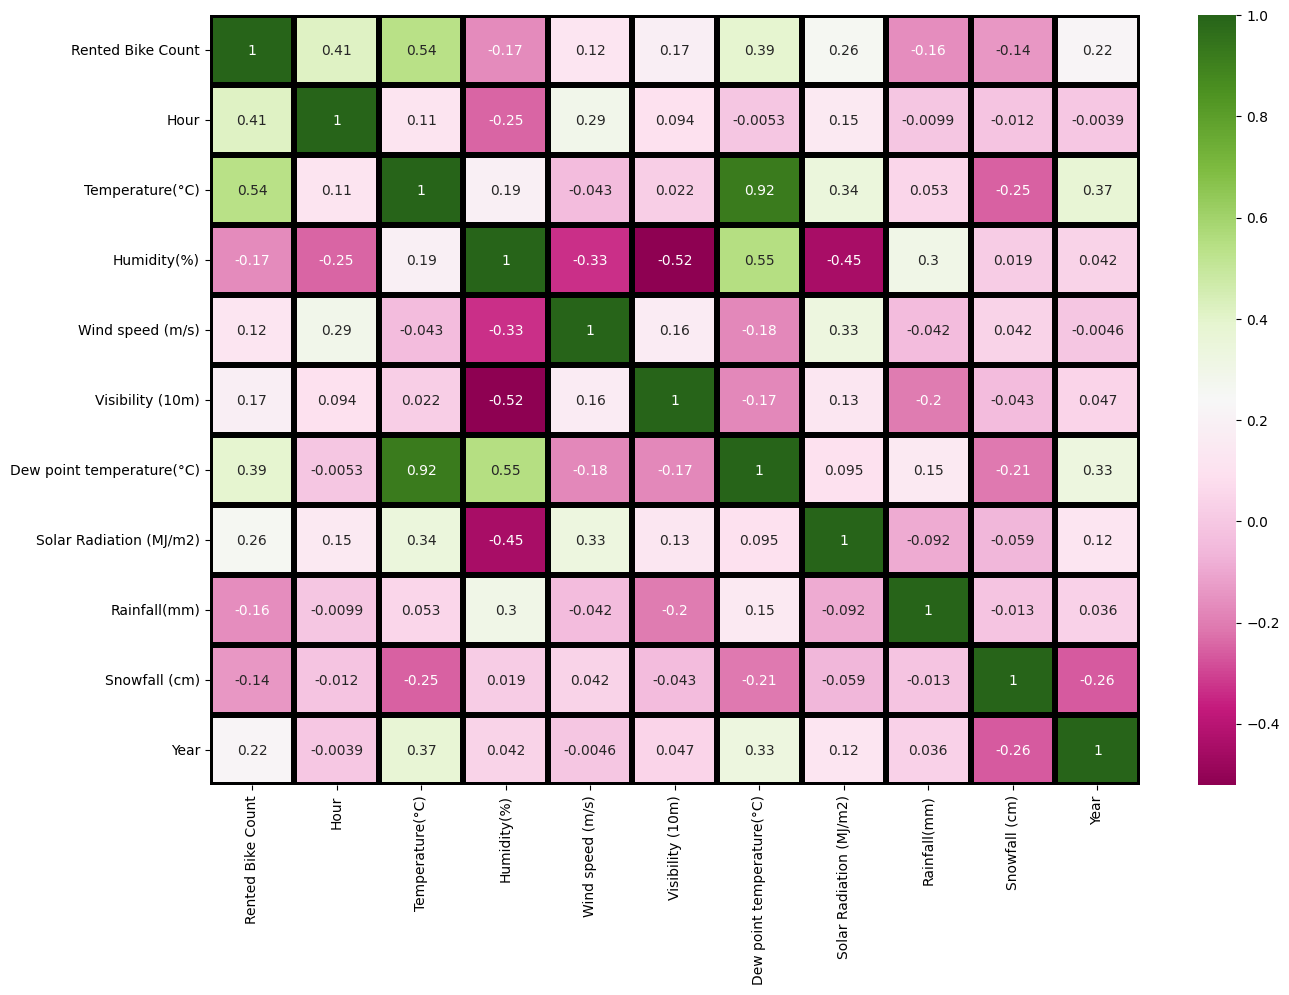

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(),annot=True,linewidths=4,linecolor="k",cmap='PiYG')

By correlation we can say that 'Dew point temperature(°C)' and Temperature(°C) columns are highly correlated

In [83]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday


# Feature Engineering

* We use here one hot encoding.
* Because there is multiple independent colum with categorical value.

In [84]:
Dataset = pd.get_dummies(df,dtype=int,drop_first=True)
Dataset

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month_May,Month_November,Month_October,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [85]:
# Check all categorical value convert into numerical value

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8305 entries, 0 to 8759
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8305 non-null   int64  
 1   Hour                       8305 non-null   int64  
 2   Temperature(°C)            8305 non-null   float64
 3   Humidity(%)                8305 non-null   int64  
 4   Wind speed (m/s)           8305 non-null   float64
 5   Visibility (10m)           8305 non-null   int64  
 6   Dew point temperature(°C)  8305 non-null   float64
 7   Solar Radiation (MJ/m2)    8305 non-null   float64
 8   Rainfall(mm)               8305 non-null   float64
 9   Snowfall (cm)              8305 non-null   float64
 10  Year                       8305 non-null   int32  
 11  Seasons_Spring             8305 non-null   int32  
 12  Seasons_Summer             8305 non-null   int32  
 13  Seasons_Winter             8305 non-null   int32  
 1

# Spliting data into train and test 

In [93]:
X = Dataset.drop(['Rented Bike Count'],axis=1)
Y = Dataset['Rented Bike Count']

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [95]:
# Shape of the Training and Test dataset

print('Shape of X_train is -' , x_train.shape)
print('Shape of X_test is -' , x_test.shape)
print('Shape of y_train is -' , y_train.shape)
print('Shape of y_test is - ', y_test.shape)
     

Shape of X_train is - (6644, 32)
Shape of X_test is - (1661, 32)
Shape of y_train is - (6644,)
Shape of y_test is -  (1661,)


In [96]:
reg = LinearRegression()

In [97]:
reg.fit(x_train, y_train)

LinearRegression()

In [98]:
reg.predict(x_test)

array([1103.1555644 , 1045.29794902, 1587.37857569, ...,  919.13397036,
        508.10209655,  796.84151473])

In [99]:
r2_score(y_test,reg.predict(x_test))

0.5738095363594286

* Important Points of Problem Statement.



* It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.

* Providing the city with a stable supply of rental bikes becomes a major concern. 

* The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Solution of Problem Statement

* From 8 AM to 9 PM is the very crucial time when people take bike on rent so comapny need to purchase new bike for better serivce.
* If they purchase new bike then waiting time of rental bike is automatically decrease.
* Spring,Summer and Autumn in these three seasons people take bike on rent in between 8AM to 9PM.
* June,July this two month where most people take a bike on rent.
* More than 8lakh bike go on rent everyday.

* If company add bike count then its help to make the rental bike available and accessible to the public at the right time.
* If they add then its provides stable supply of rental bikes in citys.
* Comany need to add aproximate 4 lakh bike for bike count required at each hour for the stable supply of rental bikes.